In [273]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

sns.set(color_codes=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerco-dataset/price_data.csv
/kaggle/input/powerco-dataset/client_data.csv


# DataSet: 
 1. Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
    * id = client company identifier
    * activity_new = category of the company’s activity
    * channel_sales = code of the sales channel
    * cons_12m = electricity consumption of the past 12 months
    * cons_gas_12m = gas consumption of the past 12 months
    * cons_last_month = electricity consumption of the last month
    * date_activ = date of activation of the contract
    * date_end = registered date of the end of the contract
    * date_modif_prod = date of the last modification of the product
    * date_renewal = date of the next contract renewal
    * forecast_cons_12m = forecasted electricity consumption for next 12 months
    * forecast_cons_year = forecasted electricity consumption for the next calendar year
    * forecast_discount_energy = forecasted value of current discount
    * forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
    * forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
    * forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
    * forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
    * has_gas = indicated if client is also a gas client
    * imp_cons = current paid consumption
    * margin_gross_pow_ele = gross margin on power subscription
    * margin_net_pow_ele = net margin on power subscription
    * nb_prod_act = number of active products and services
    * net_margin = total net margin
    * num_years_antig = antiquity of the client (in number of years)
    * origin_up = code of the electricity campaign the customer first subscribed to
    * pow_max = subscribed power
    * churn = has the client churned over the next 3 months

 2. Historical pricing data: variable and fixed pricing data etc
 
    * id = client company identifier
    * price_date = reference date
    * price_off_peak_var = price of energy for the 1st period (off peak)
    * price_peak_var = price of energy for the 2nd period (peak)
    * price_mid_peak_var = price of energy for the 3rd period (mid peak)
    * price_off_peak_fix = price of power for the 1st period (off peak)
    * price_peak_fix = price of power for the 2nd period (peak)
    * price_mid_peak_fix = price of power for the 3rd period (mid peak)


# Objectives
1. Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions.
2. Verify the hypothesis of price sensitivity being to some extent correlated with churn.
3. Prepare a summary or slide of key findings and add some suggestions for data augmentation

# 1. Client DataSet

In [274]:
client_path='/kaggle/input/powerco-dataset/client_data.csv'
client=pd.read_csv(client_path)
client.head(5)

,client id,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,5,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [275]:
client_df=client.drop(['client id'],axis=1)

In [276]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

**convert datetime object to datetime data type**

In [277]:
for t in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[t]=pd.to_datetime(client_df[t])

**check utilities activate and end year**

In [278]:
client_df['contract_activate_year']=client_df['date_activ'].dt.year
client_df['contract_end_year']=client_df['date_end'].dt.year

In [279]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_activate_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010,2016
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2010,2016


**check missing values and duplicate rows**

In [280]:
def duplicate_and_missing(dataset,dataset_name):
    print("There are",dataset.shape[0],"rows and ",dataset.shape[1],"columns in ",dataset_name)
    
    if dataset.isna().sum().sum() != 0:
        missing_values=dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_values['proportion']=missing_values['count']/len(dataset)
        
        print("There are ",dataset.isna().sum().sum()," missing values")
        print(missing_values)
        
    else:
        print("There is no missing value in",dataset_name)
        
    if dataset.duplicated().sum() !=0:
        print("There are ",dataset.duplicated().sum()," duplicate rows\n")
        
    else:
        print("There are no duplicate rows\n")

In [281]:
duplicate_and_missing(dataset=client_df,dataset_name='Client Dataset')

There are 14606 rows and  28 columns in  Client Dataset
There is no missing value in Client Dataset
There are no duplicate rows



**Now check for categorical Values**

In [282]:
cat_columns = client_df.dtypes[client_df.dtypes=='object']
cat_columns

id               object
channel_sales    object
has_gas          object
origin_up        object
dtype: object

In [283]:
def describe_categorical(dataset):
    cat_columns=dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns) !=0:
        print("Categorical Columns are ",cat_columns)
        for cat in cat_columns:
            des_frame=dataset[[cat]].value_counts().reset_index(name="count")
            des_frame['proportion']=des_frame['count']/len(dataset)
            print(des_frame)
    else:
        print("There is no categorical value in the dataset.")

In [284]:
describe_categorical(dataset=client_df)

Categorical Columns are  ['id', 'channel_sales', 'has_gas', 'origin_up']
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns]
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413
1                           MISSING   3725    0.255032
2  lmkebamcaaclubfxadlmueccx

By observing the above values, we can say that the origin_up and channel_sales values are not undestandable.
Thus we convert these by encoded data into numeric data by label encoding

In [285]:
label_encoder=LabelEncoder()
client_df['channel_sales']=label_encoder.fit_transform(client_df['channel_sales'])
client_df['origin_up']=label_encoder.fit_transform(client_df['origin_up'])

In [286]:
int_columns = client_df.dtypes[client_df.dtypes=='int']
float_columns = client_df.dtypes[client_df.dtypes=='float']

if len(int_columns)+len(float_columns) !=0:
    print("columns are: \n",int_columns+float_columns)


columns are: 
 channel_sales                     NaN
churn                             NaN
cons_12m                          NaN
cons_gas_12m                      NaN
cons_last_month                   NaN
contract_activate_year            NaN
contract_end_year                 NaN
forecast_cons_12m                 NaN
forecast_cons_year                NaN
forecast_discount_energy          NaN
forecast_meter_rent_12m           NaN
forecast_price_energy_off_peak    NaN
forecast_price_energy_peak        NaN
forecast_price_pow_off_peak       NaN
imp_cons                          NaN
margin_gross_pow_ele              NaN
margin_net_pow_ele                NaN
nb_prod_act                       NaN
net_margin                        NaN
num_years_antig                   NaN
origin_up                         NaN
pow_max                           NaN
dtype: object


In [287]:
def describe_numeric(dataset):
    int_columns=dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    float_columns=dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    
    if len(int_columns) + len(float_columns) !=0:
        print("Numerical variable columns are ",int_columns+float_columns)
        
        if len(int_columns) !=0:
            for i in int_columns:
                desc_frame=dataset[[i]].value_counts().reset_index(name="count")
                desc_frame['Proportion']=desc_frame['count']/len(dataset)
                print(desc_frame)
        print(dataset[int_columns+float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}))
     
        
        print("There is no numerical values in the dataset.")

In [288]:
describe_numeric(dataset=client_df)

Numerical variable columns are  ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'forecast_discount_energy', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn', 'contract_activate_year', 'contract_end_year', 'forecast_cons_12m', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
   channel_sales  count  Proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137
       cons_12m  count  Proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232
4       3926060     18   

In [289]:
client_df[client_df.dtypes[client_df.dtypes=='datetime64[ns]'].index.to_list()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


# 2. Price DataSet

In [290]:
price_path='/kaggle/input/powerco-dataset/price_data.csv'
price=pd.read_csv(price_path)
price.head(5)

,data,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,1,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,2,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,3,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,4,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,5,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [291]:
price_df=price.drop(['data'],axis=1)

In [292]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [293]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [294]:
price_df['price_date']=pd.to_datetime(price_df['price_date'])

In [295]:
duplicate_and_missing(dataset=price_df,dataset_name='price')

There are 193002 rows and  8 columns in  price
There is no missing value in price
There are no duplicate rows



In [296]:
describe_categorical(dataset=price_df)

Categorical Columns are  ['id']
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns]


In [297]:
describe_numeric(dataset=price_df)

Numerical variable columns are  ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000
There is no numerical values in the dataset.


In [298]:
price_df['price_date'].describe(datetime_is_numeric=True)

count                           193002
mean     2015-06-16 12:50:49.933161216
min                2015-01-01 00:00:00
25%                2015-04-01 00:00:00
50%                2015-07-01 00:00:00
75%                2015-10-01 00:00:00
max                2015-12-01 00:00:00
Name: price_date, dtype: object

In [299]:
client_df.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_activate_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016


**Now, let's get various insights from data.**

In [300]:
#show a bar chart of the customers who changes their providers(churn)

def bar_chart_cust_percent_distribution(df,target,if_sort=False,gap_bar_level=0,figsize=(10,6)):
    
    plot_data=df[[target]].value_counts().reset_index(name='count')
    plot_data['percent']=plot_data['count']/plot_data['count'].sum()
    
    fig=plt.figure(figsize=figsize)
    ax=sns.barplot(data=plot_data,x=target,y='percent')
    
    for p in ax.patches:
        x=p.get_x()+p.get_width()/2
        y=p.get_height()+gap_bar_level
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100),xy=(x,y),ha='center')
    ax.margins(y=0.1)
    

In [301]:
def stacked_bar_percent_churn(df,target,if_sort=False,figsize=(10,6)):
    
    plot_data=df.groupby([target,'churn']).size().reset_index(name='count')
    plot_data=plot_data.pivot(index=target,columns='churn',values='count').fillna(0)
                                        
    plot_data=plot_data.div(plot_data.sum(axis=1),axis=0)
    
    if if_sort:
        plot_data=plot_data.sort_values(by=[0])
    ax=plot_data.plot(kind='bar',rot=False,stacked=True,figsize=figsize)
    plt.legend(['Churn No','Churn Yes'],loc='upper center')
    
    for p in ax.patches:
        percentage='{:.2f}%'.format(p.get_height()*100)
        if percentage != '0.0%':
            x=p.get_x()+p.get_width()/2
            y=1-p.get_height()
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

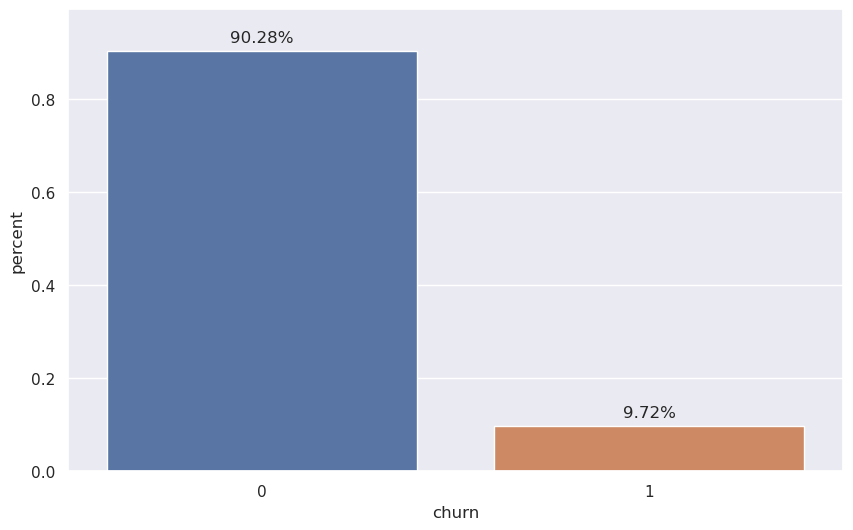

In [302]:
bar_chart_cust_percent_distribution(df=client_df,target='churn',gap_bar_level=0.02)

So this insights shows that 9.72% customers shifted to another distributer.

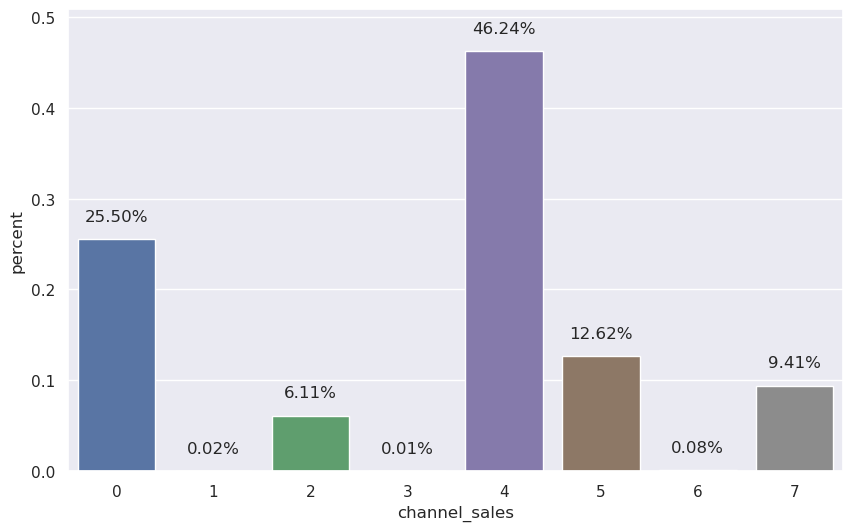

In [303]:
bar_chart_cust_percent_distribution(df=client_df,target='channel_sales',if_sort=True,gap_bar_level=0.02)

Here it showss that type 4 has most channel_sales of 46.25%.

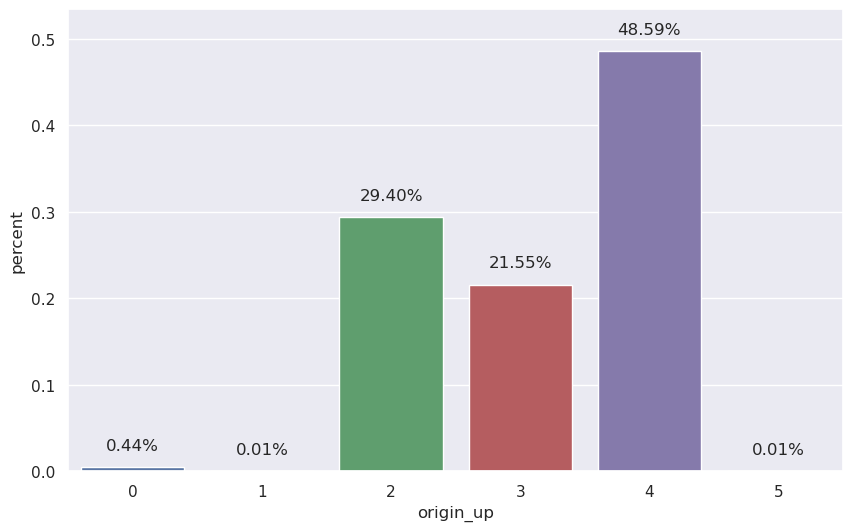

In [304]:
bar_chart_cust_percent_distribution(df=client_df,target='origin_up',gap_bar_level=0.02)

Type 4,the customer first subscribed and most subscribed electricity campaign.

Stacked Bar Chart for the distribution of the churning customers.

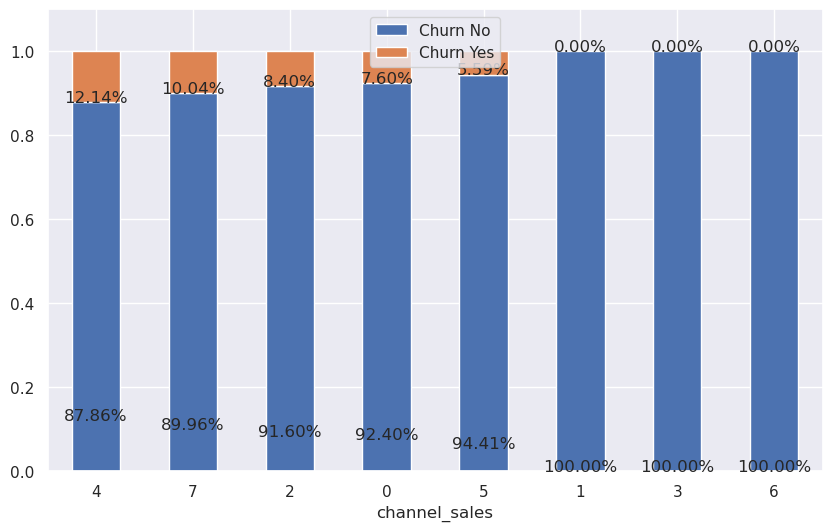

In [305]:
stacked_bar_percent_churn(df=client_df,target='channel_sales',if_sort=True)

The Proportion of churning customers from range 5.59%-12.14% from different channel_sales

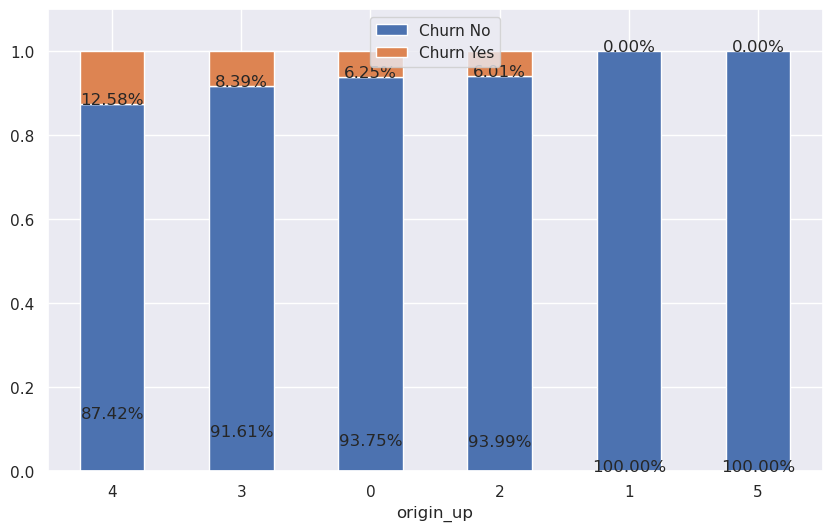

In [306]:
stacked_bar_percent_churn(df=client_df,target='origin_up',if_sort=True)

Customers suscribed first after diffn caimpaign, shows their churning ranges from 6.01%-12.58% 

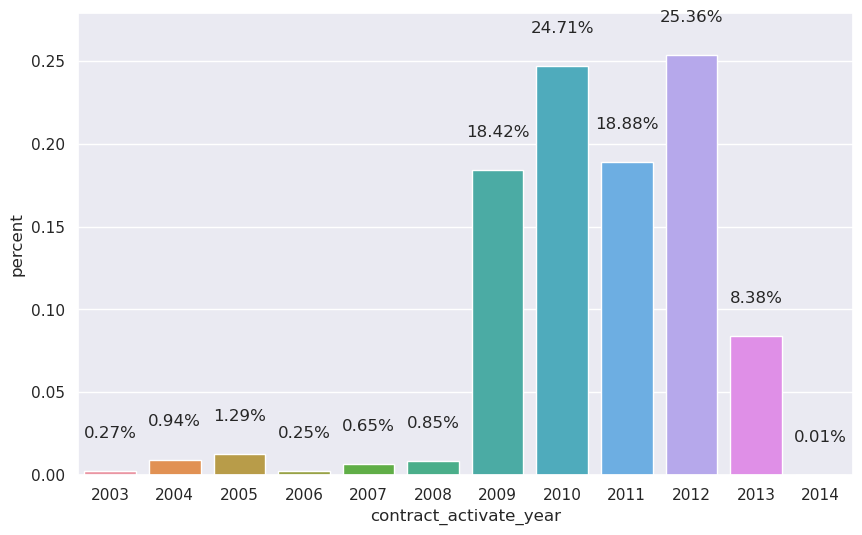

In [307]:
bar_chart_cust_percent_distribution(df=client_df,target='contract_activate_year',gap_bar_level=0.02)

In different years 2003-2014, the year 2009-2013 in which customer did not churn or switch to other providers.

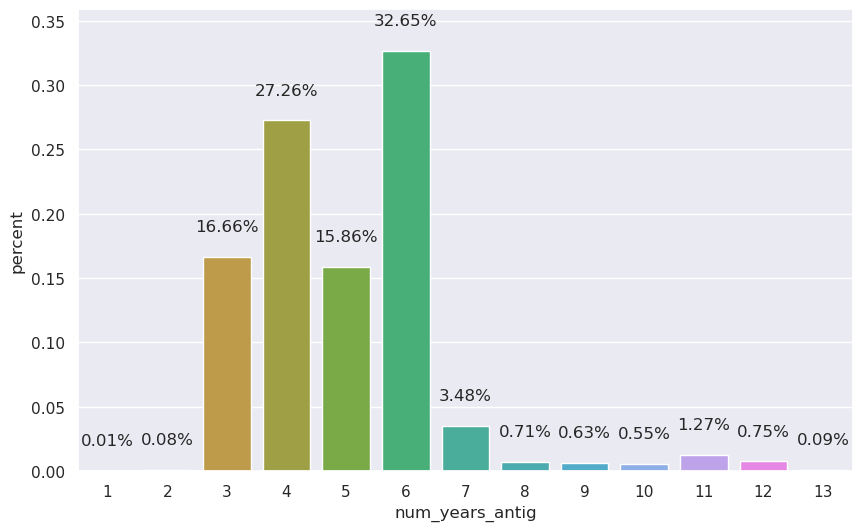

In [308]:
bar_chart_cust_percent_distribution(df=client_df,target='num_years_antig',gap_bar_level=0.02)

Customers mainly stayed between 3-7 years. it seems newer customer are likely to switch to another providers.

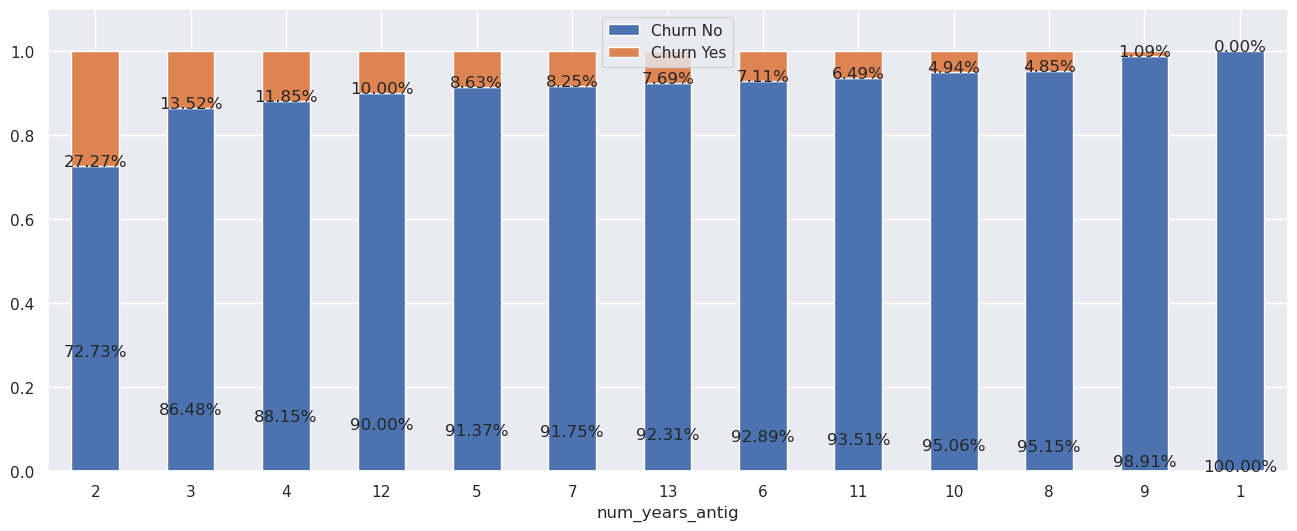

In [309]:
stacked_bar_percent_churn(df=client_df,target='num_years_antig',if_sort=True,figsize=(16,6))

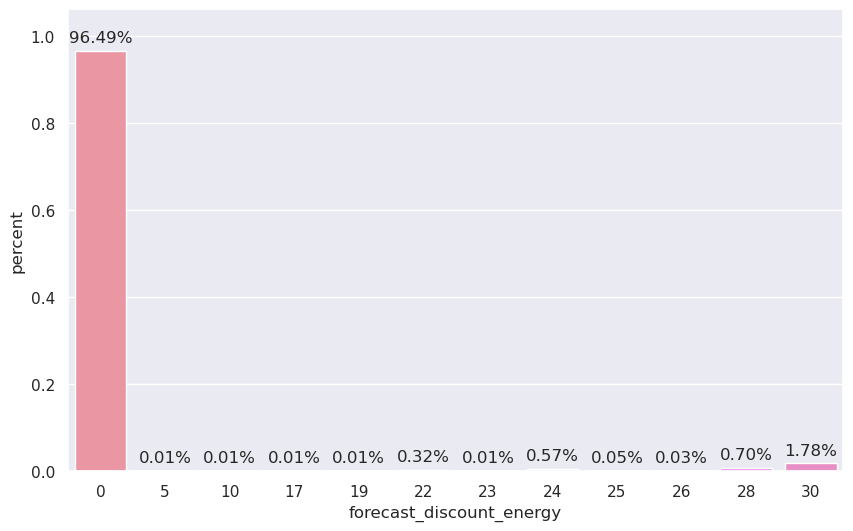

In [310]:
bar_chart_cust_percent_distribution(df=client_df,target='forecast_discount_energy',gap_bar_level=0.02)

Currently Forecast discount value is nearly zero.

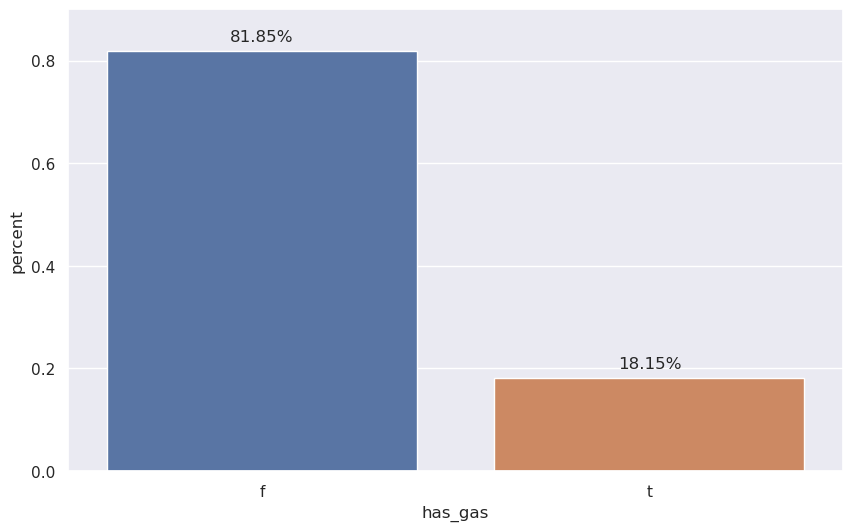

In [311]:
bar_chart_cust_percent_distribution(df=client_df,target='has_gas',gap_bar_level=0.02)

Just 18.15% of the total customers also has the gas connection.

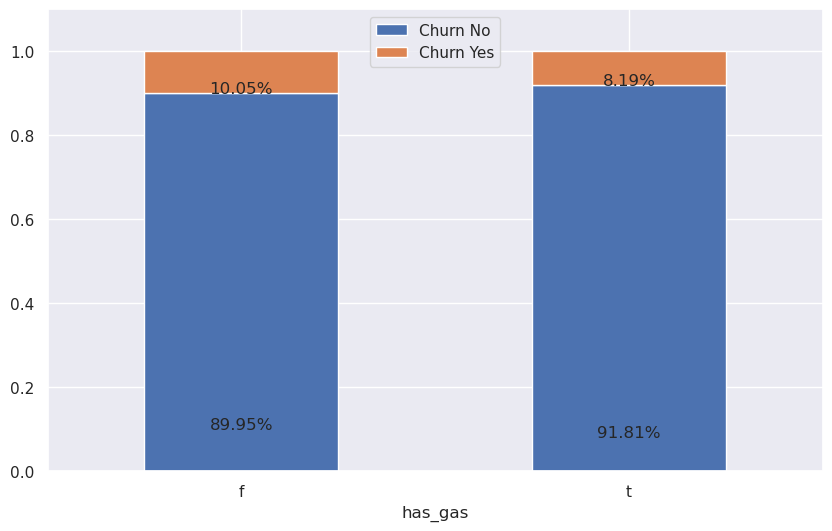

In [312]:
stacked_bar_percent_churn(df=client_df,target='has_gas',if_sort=True,figsize=(10,6))

Electricity customers churns more than gas customers.

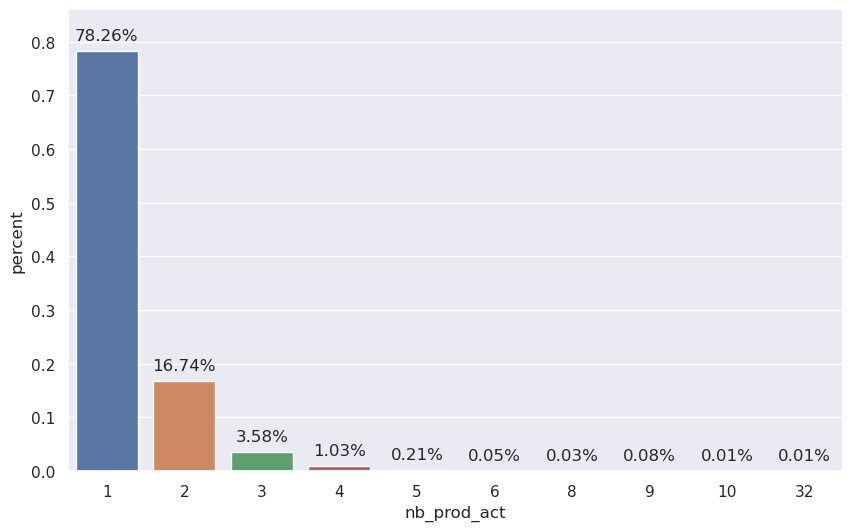

In [313]:
bar_chart_cust_percent_distribution(df=client_df,target='nb_prod_act',gap_bar_level=0.02)

In [314]:
def hist_chart_cust_churn(df, target, figsize=(16,6), if_churn=True,bins=100):
    fig = plt.figure(figsize=figsize)
    
    if if_churn:
        ax=sns.histplot(data=df,x=target,bins=bins,hue='churn')
    else:
        ax=sns.histplot(data=df,x=target,bins=bins)

Histogram of energy consumption feature

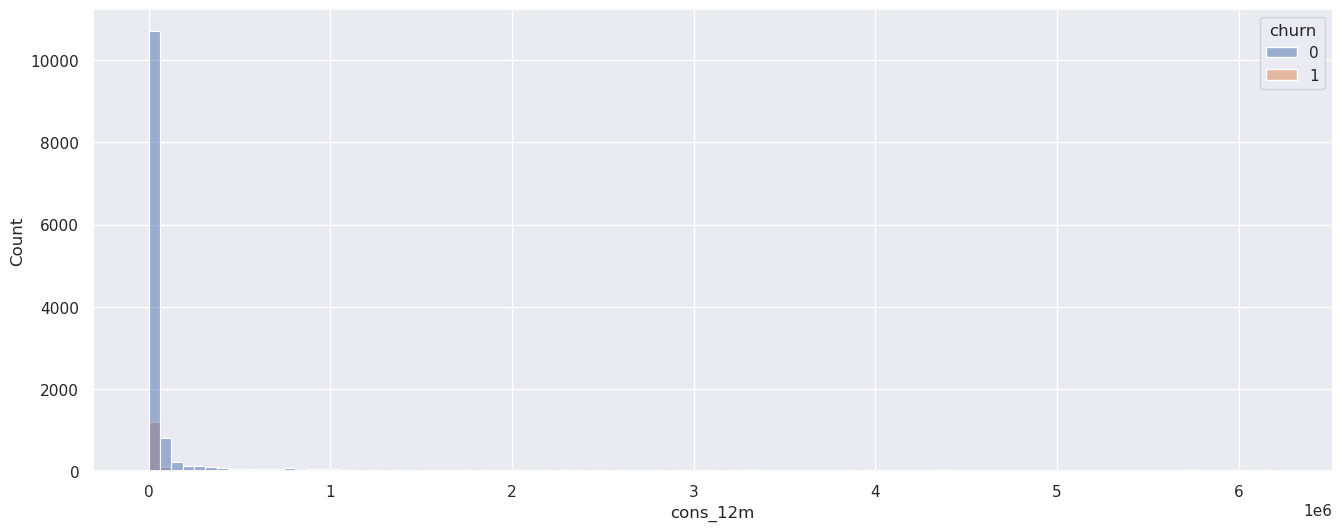

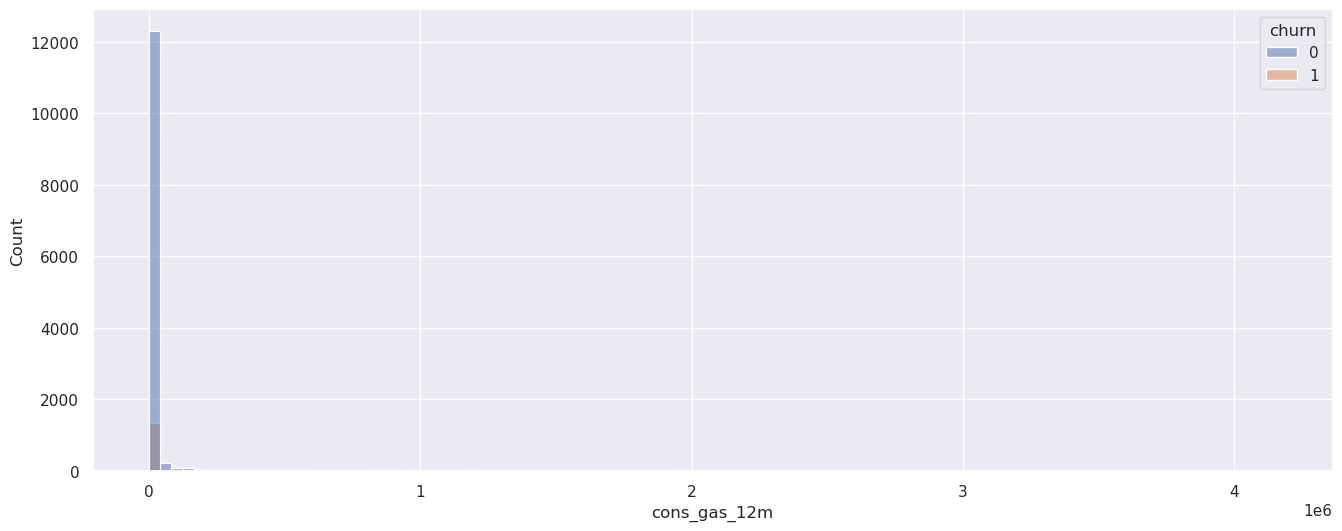

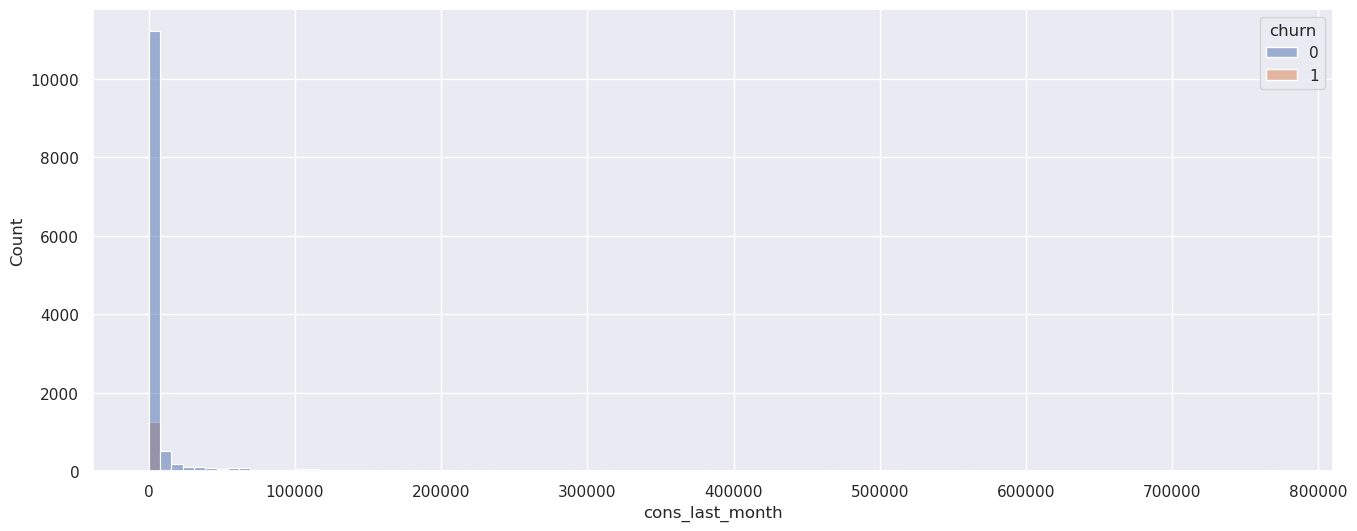

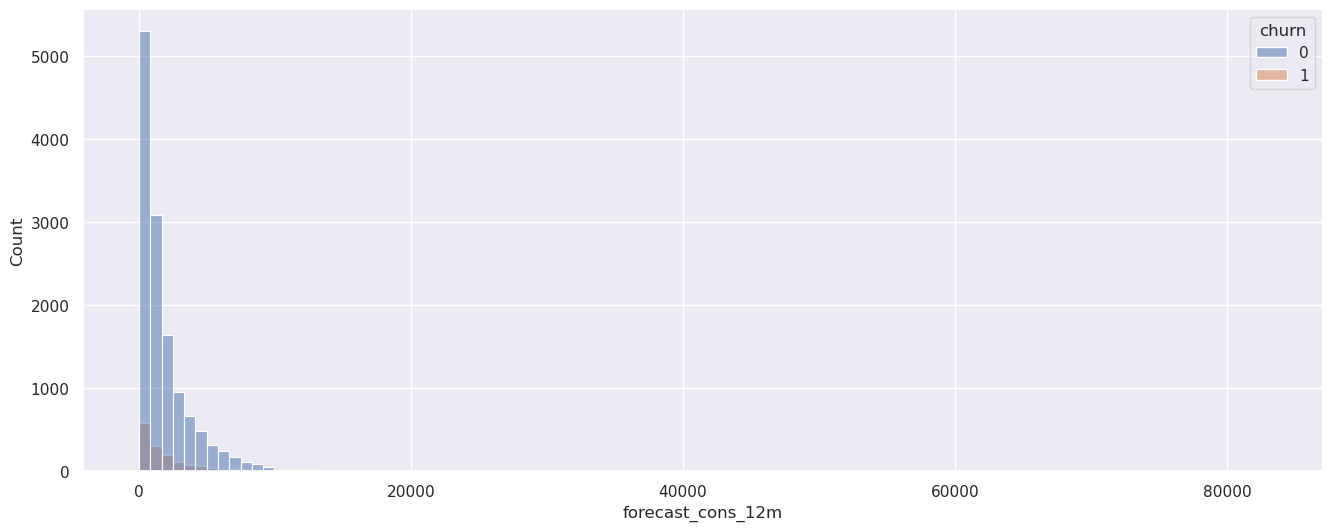

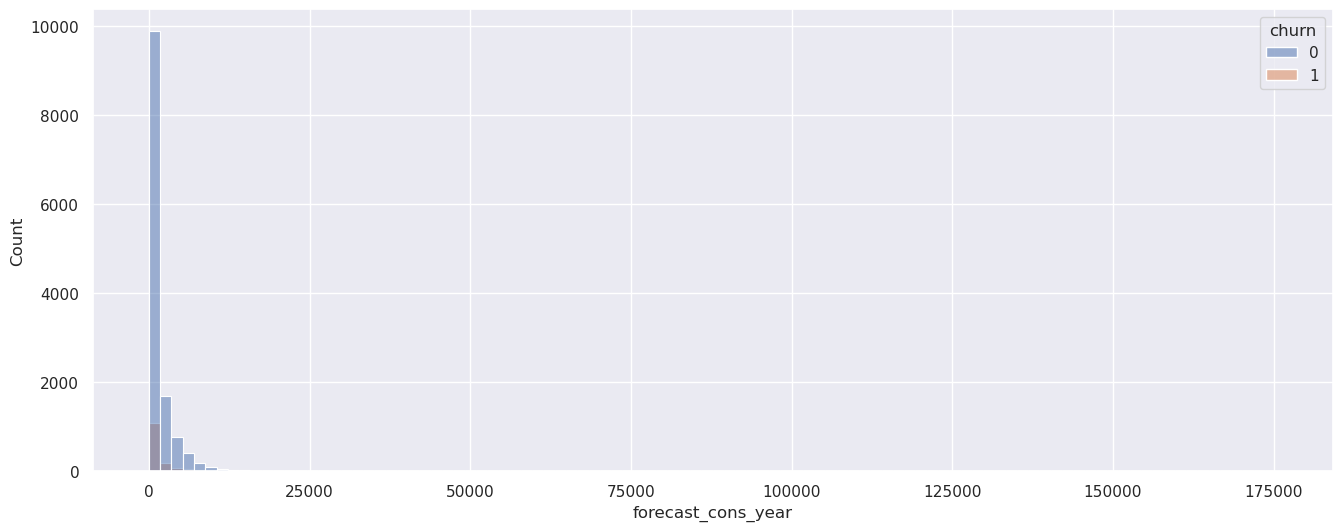

In [315]:
for col in ['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year']:
    hist_chart_cust_churn(df=client_df,target=col)

Histograms of diffferent price features of the price dataset

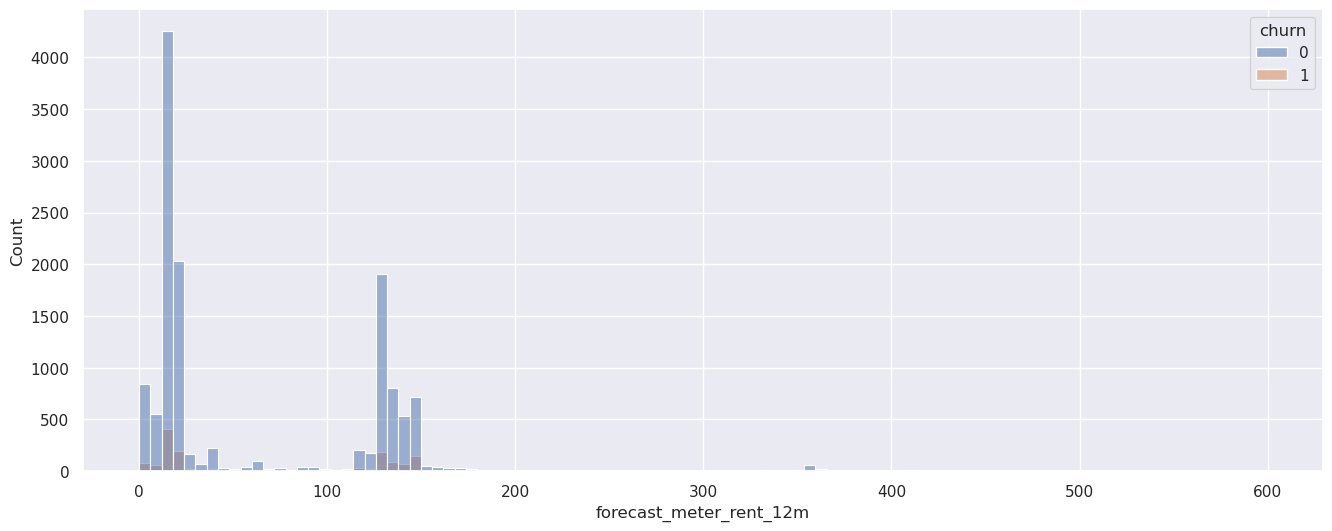

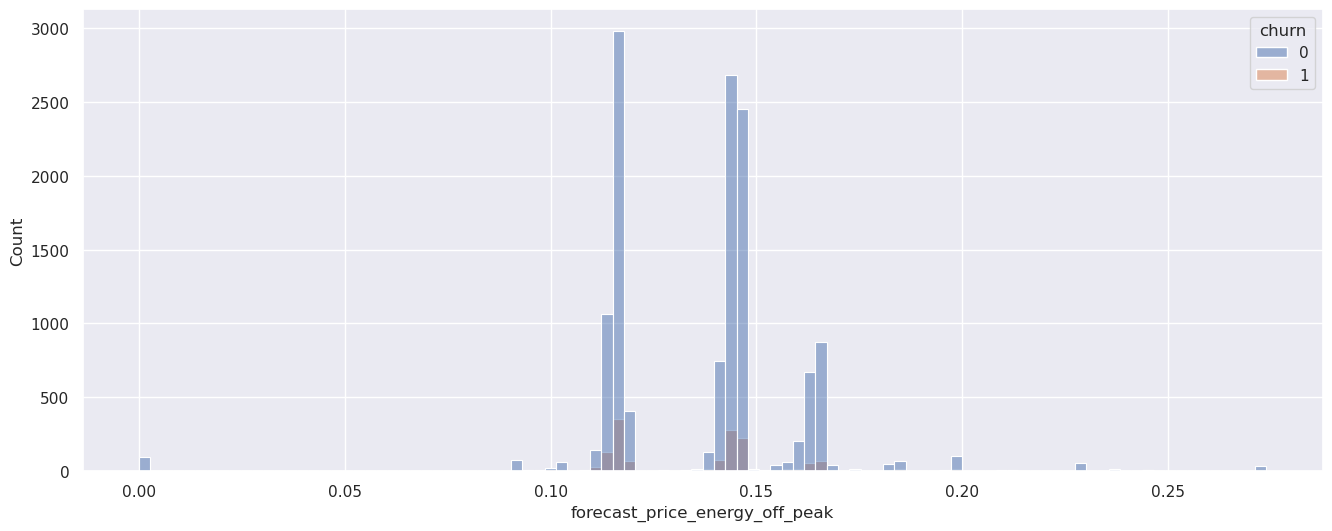

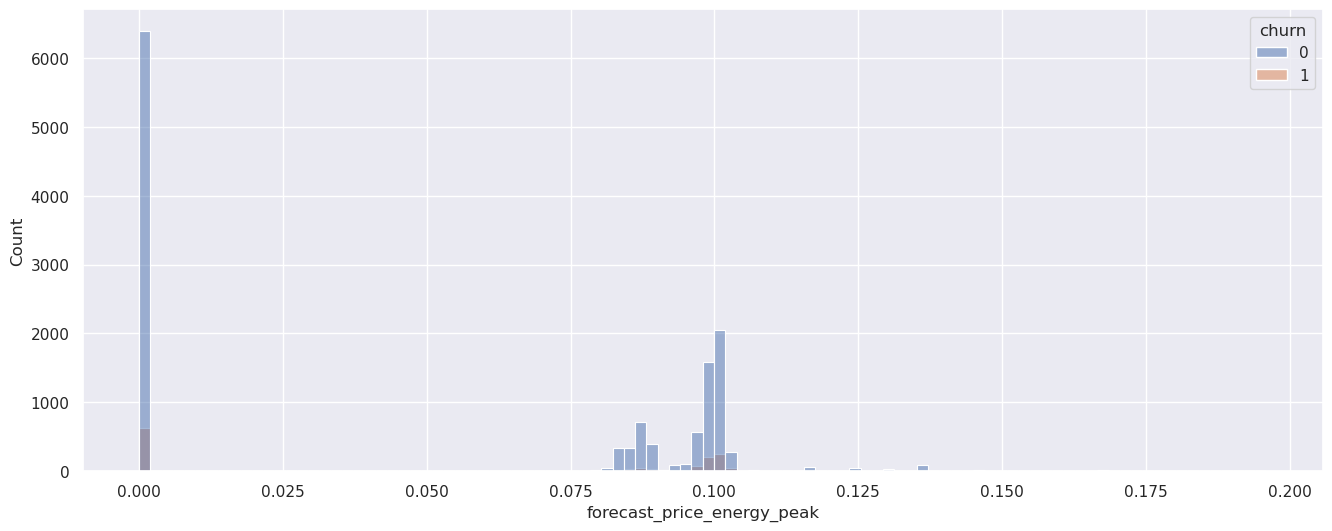

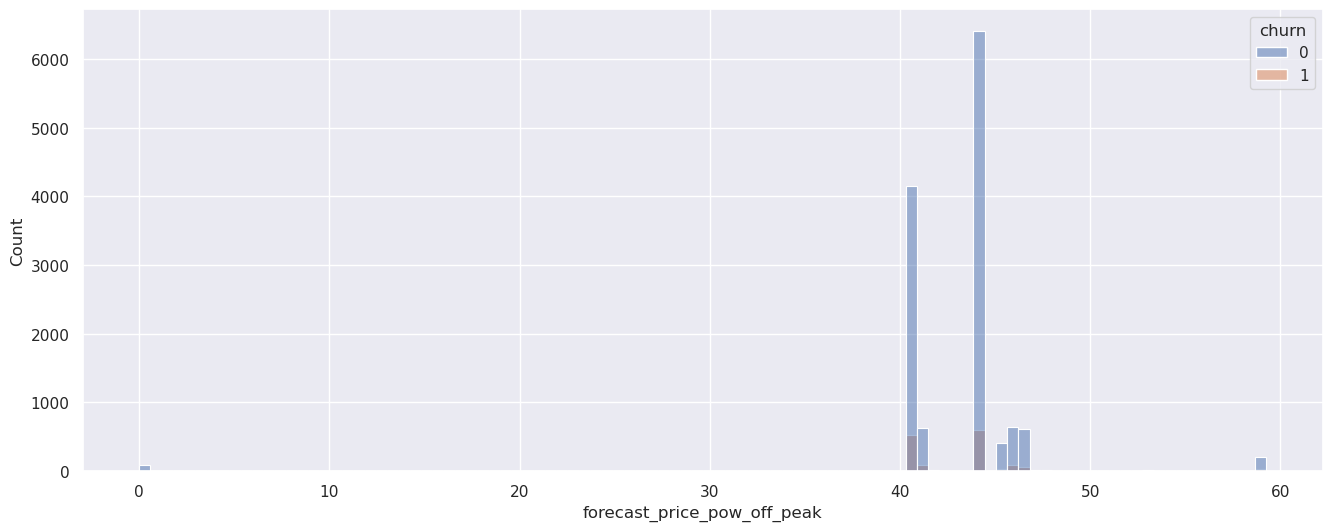

In [316]:
for i in ['forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']:
    hist_chart_cust_churn(df=client_df,target=i)

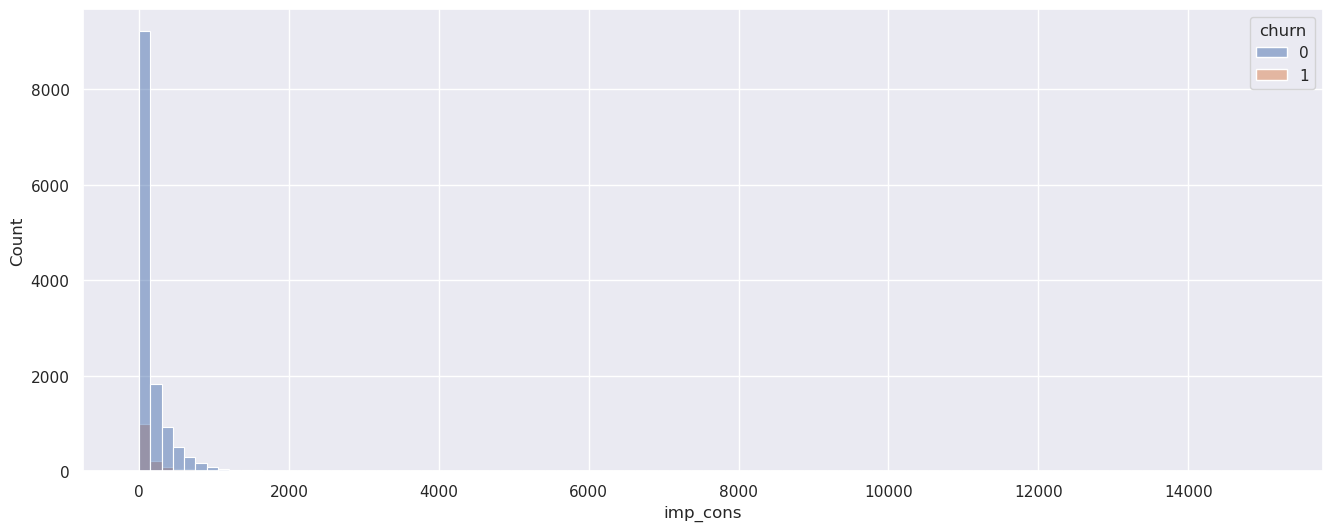

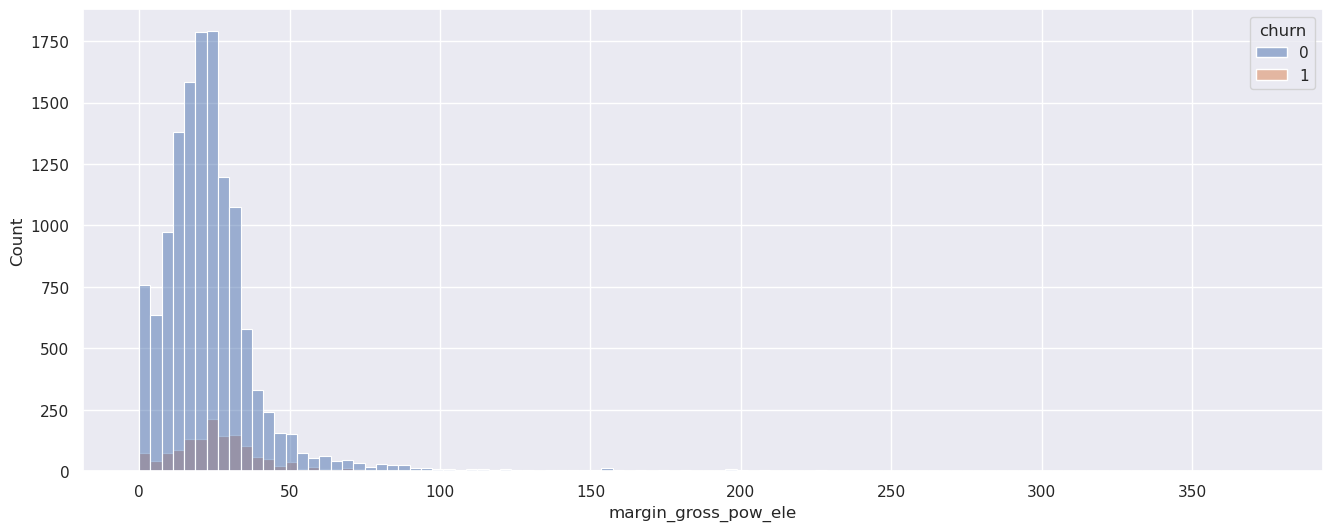

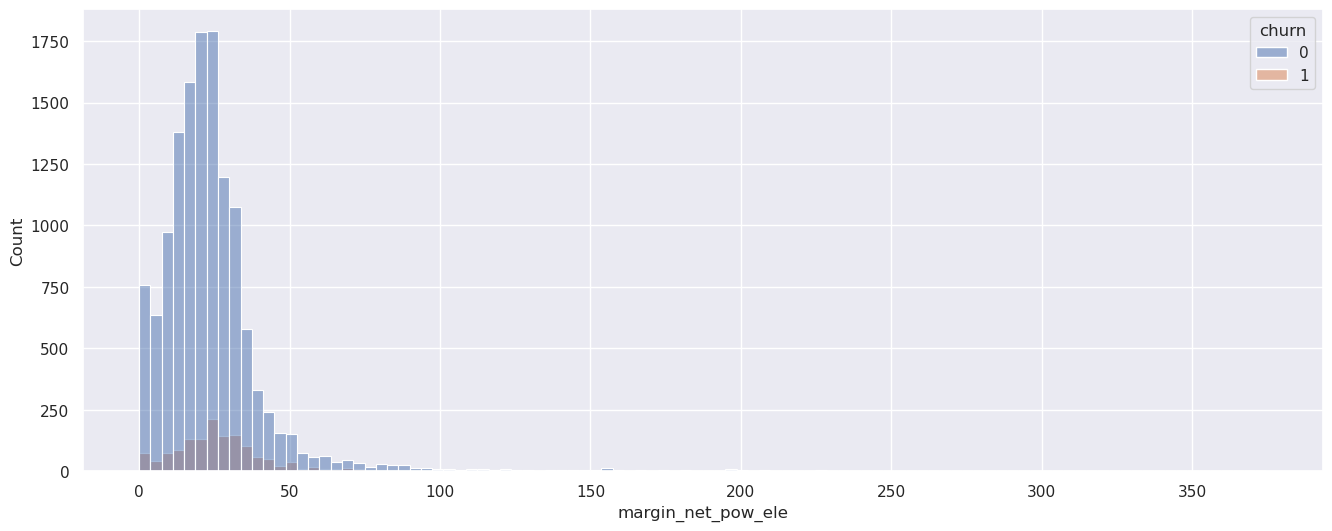

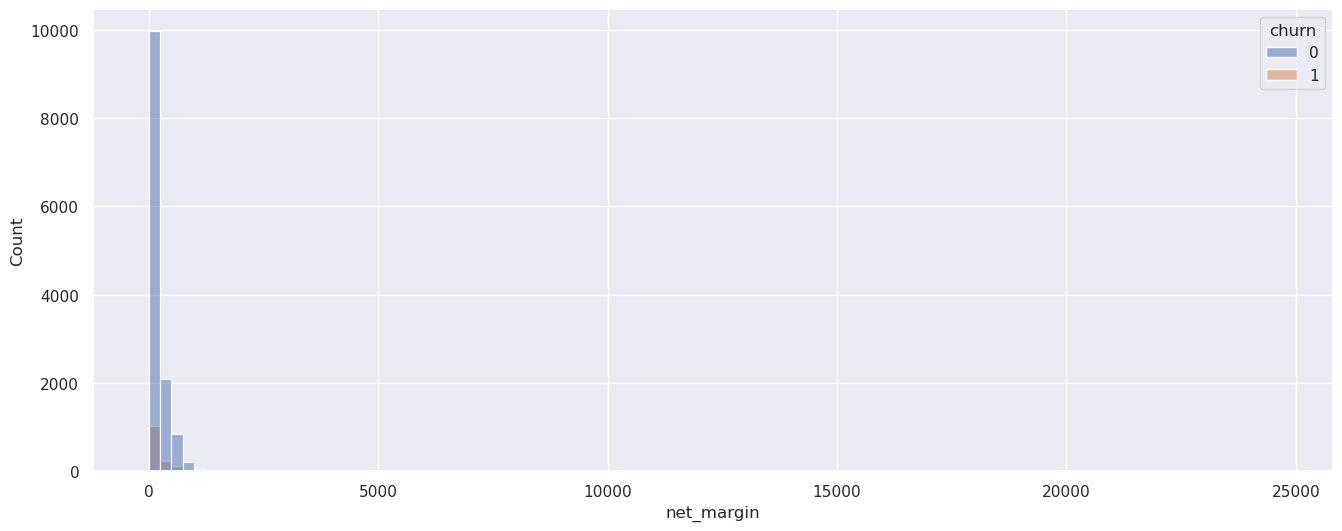

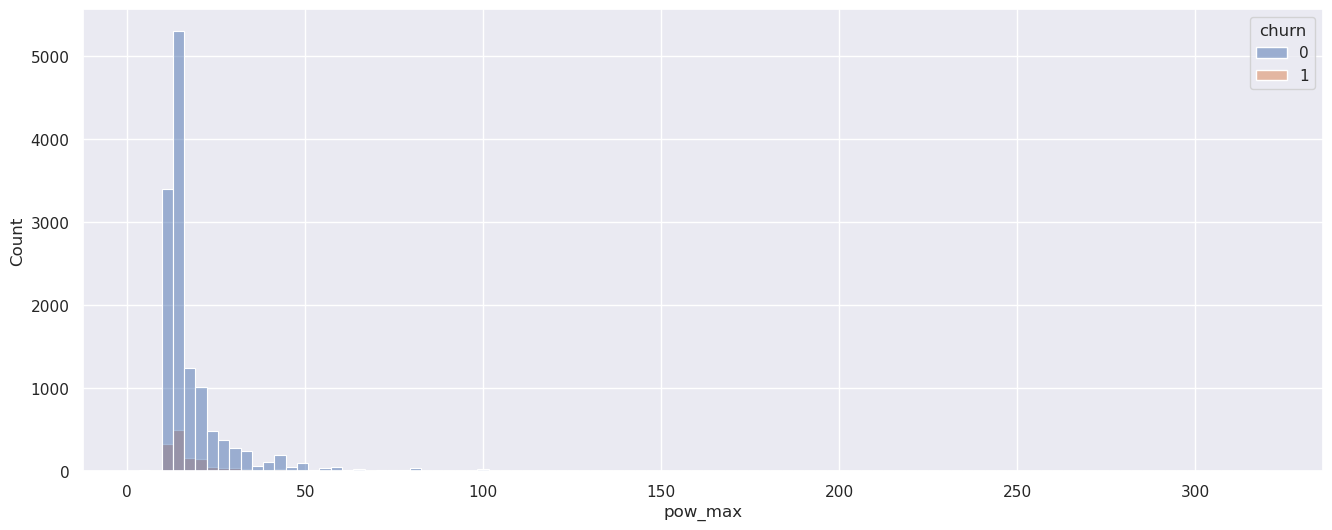

In [317]:
for i in ['imp_cons','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']:
    hist_chart_cust_churn(df=client_df,target=i)

# Now let's check for the price dataset.
# 

**Sub Task 2**

Now, let's check customers sensitivity to price. (Note: Normally, assuming other factors do not change, when the price increases and some cutomers switch, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. But, if there is a decrease or no change in the price and cutomers still change their proveiders, I think in this case we cannot say these cutomers are sensitive to price.)

In [318]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [319]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

We can see not all customers have the same number of price records. The vast majority of customers have 12 price reocrds and very few customers has less than 12 records.
Most of the customers transaction is between 12 month price records.

In [320]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

Calculate average, maximum, minimum prices of the whole year

In [321]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


Merge client and price_cal dataset

In [322]:
price_stat = price_stat.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


check for the biggest changes in price over the whole year.

In [323]:
# 
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


This shows most of the customers price did not change and it remains stable.

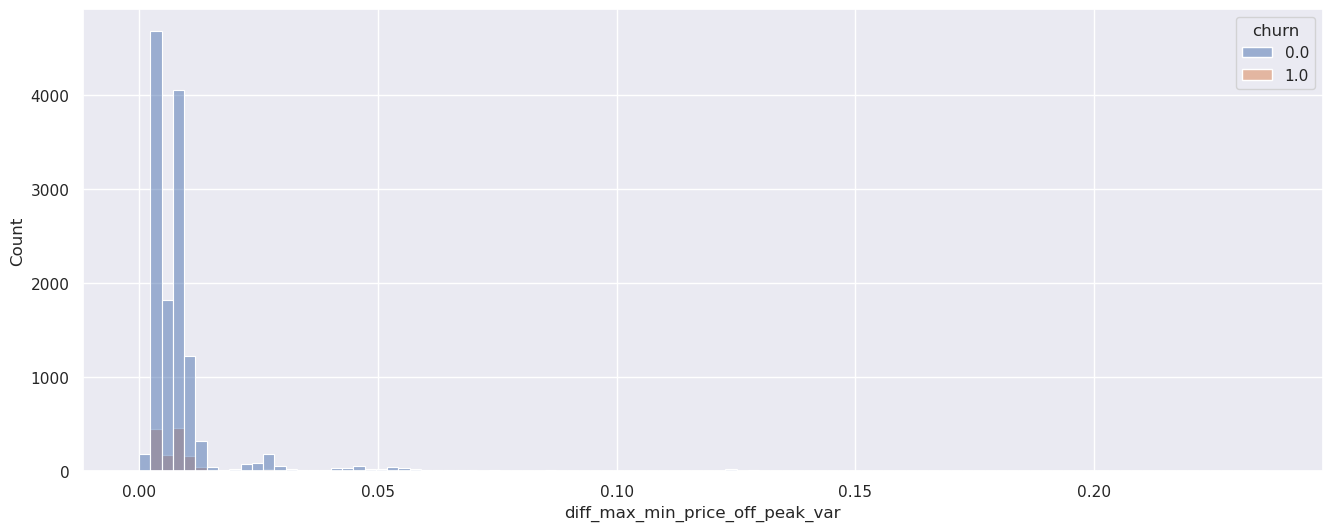

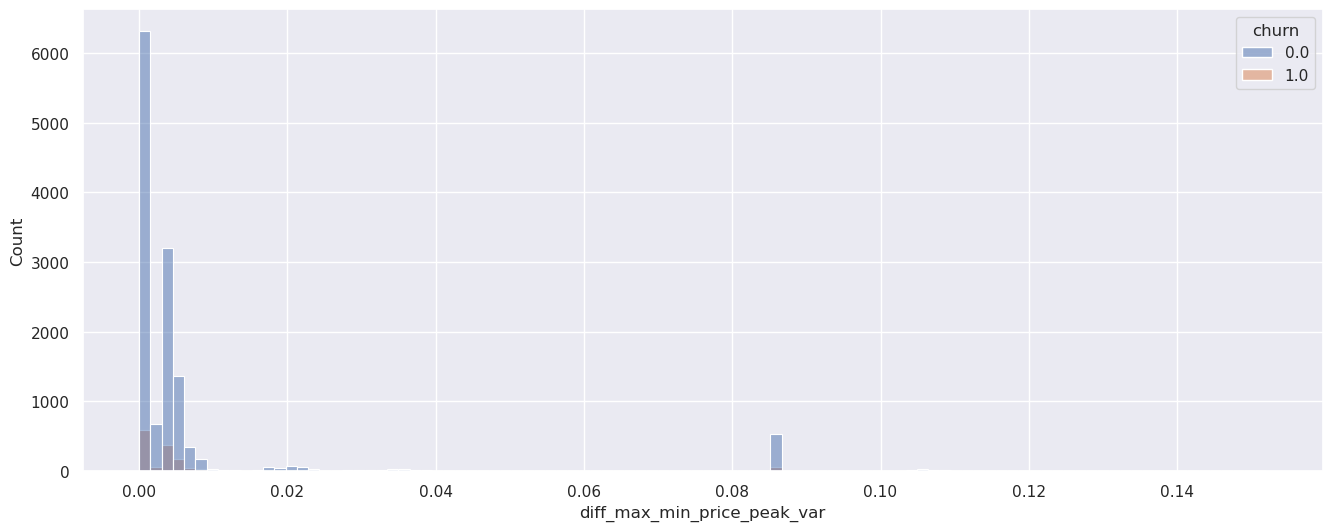

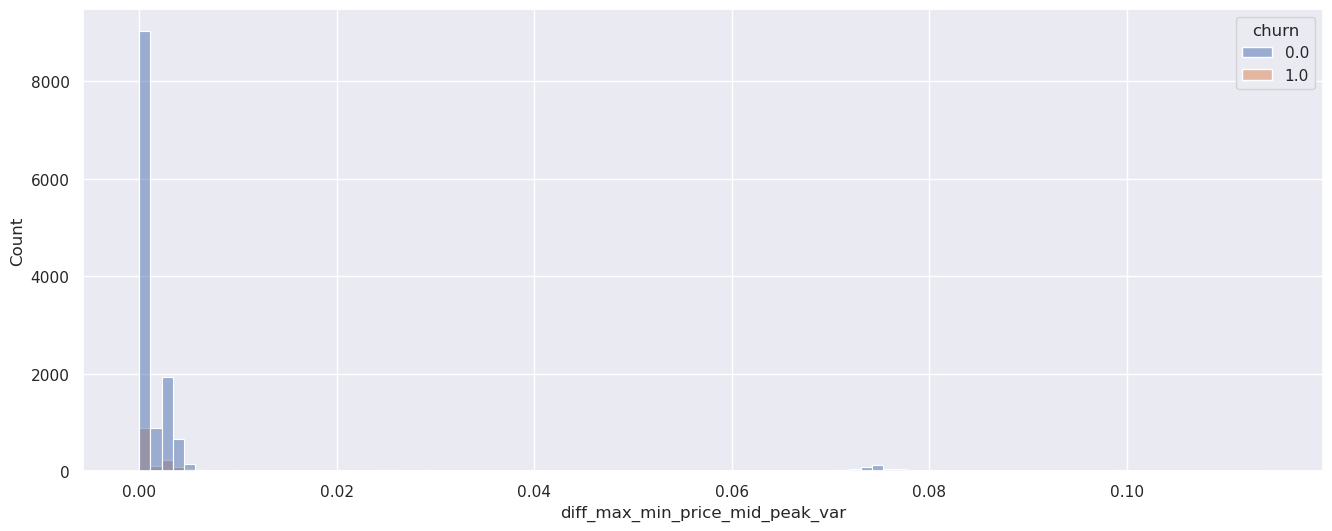

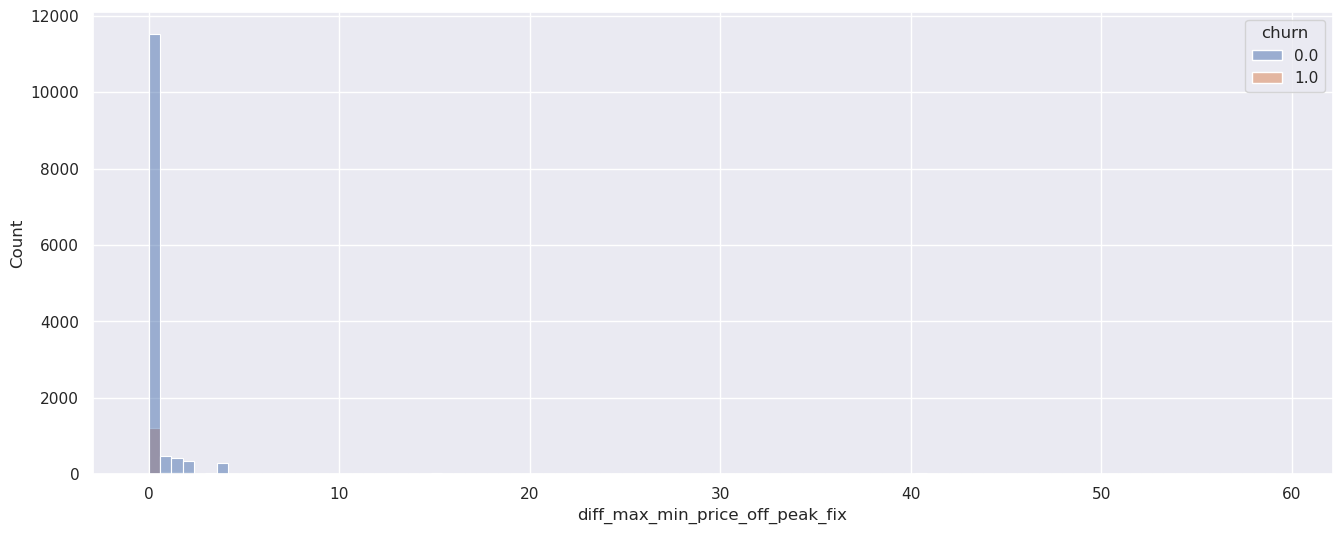

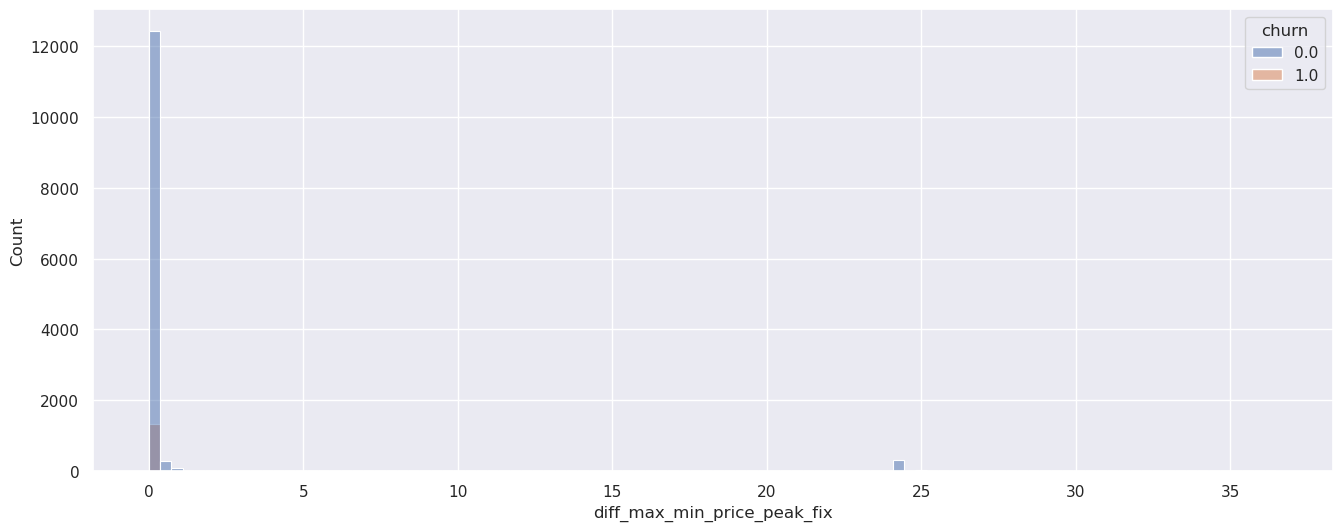

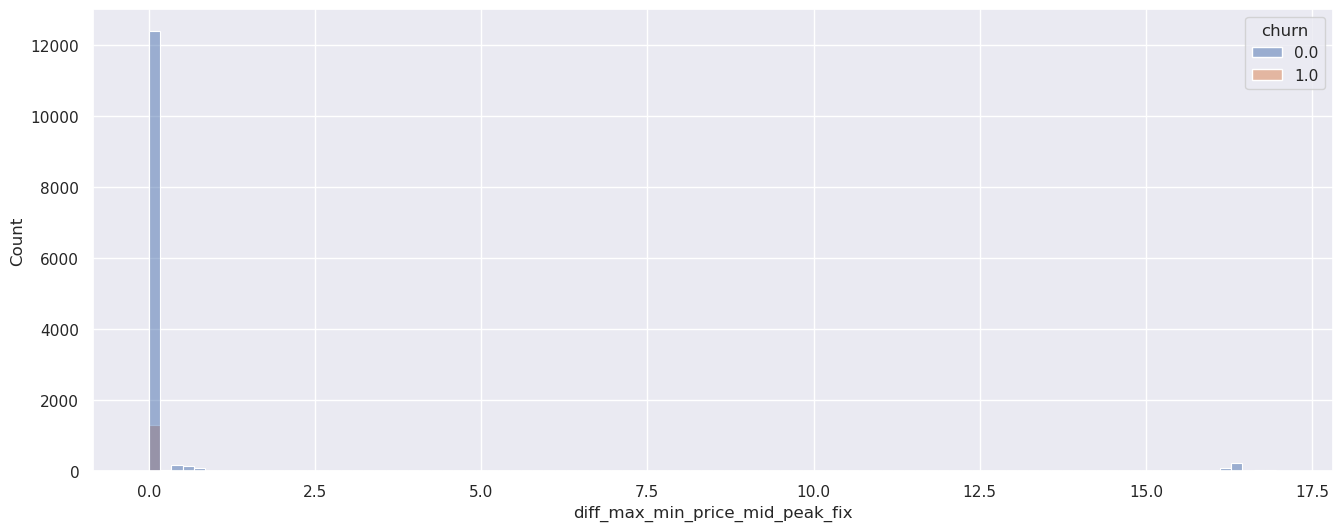

In [324]:
for attr in price_attr:
    hist_chart_cust_churn(df=price_stat, target=f'diff_max_min_{attr}', if_churn=True)

Calculate Last month (2015-12-01) Price and their mean.

In [325]:
for attr in price_attr:
    price_stat[f'diff_dec_mean_{attr}']=price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
    
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_dec_mean_price_off_peak_var,diff_dec_mean_price_peak_var,diff_dec_mean_price_mid_peak_var,diff_dec_mean_price_off_peak_fix,diff_dec_mean_price_peak_fix,diff_dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


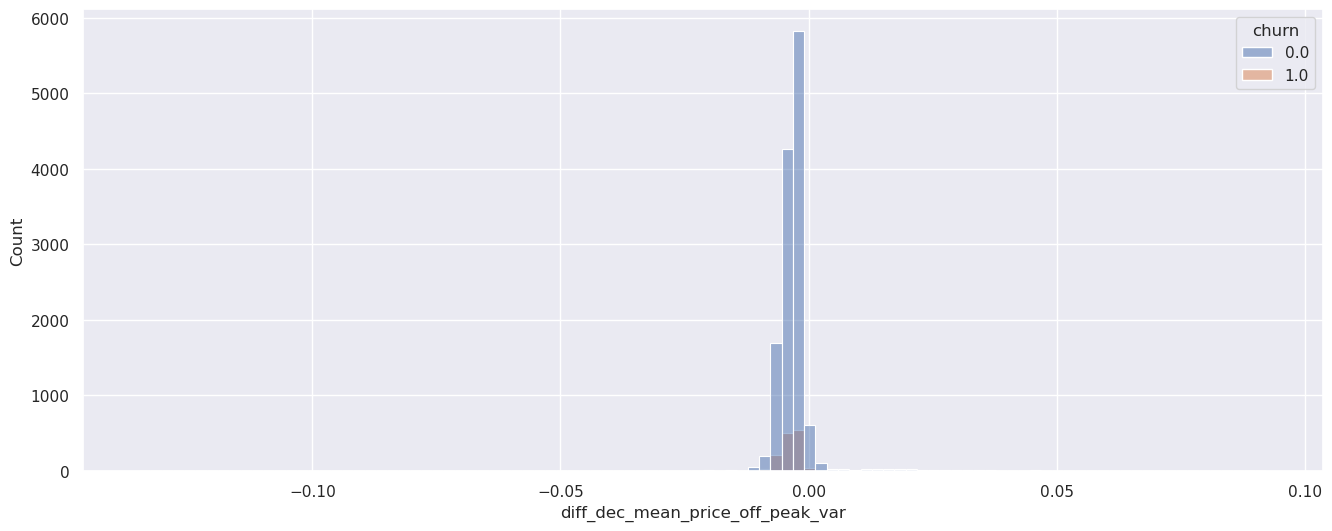

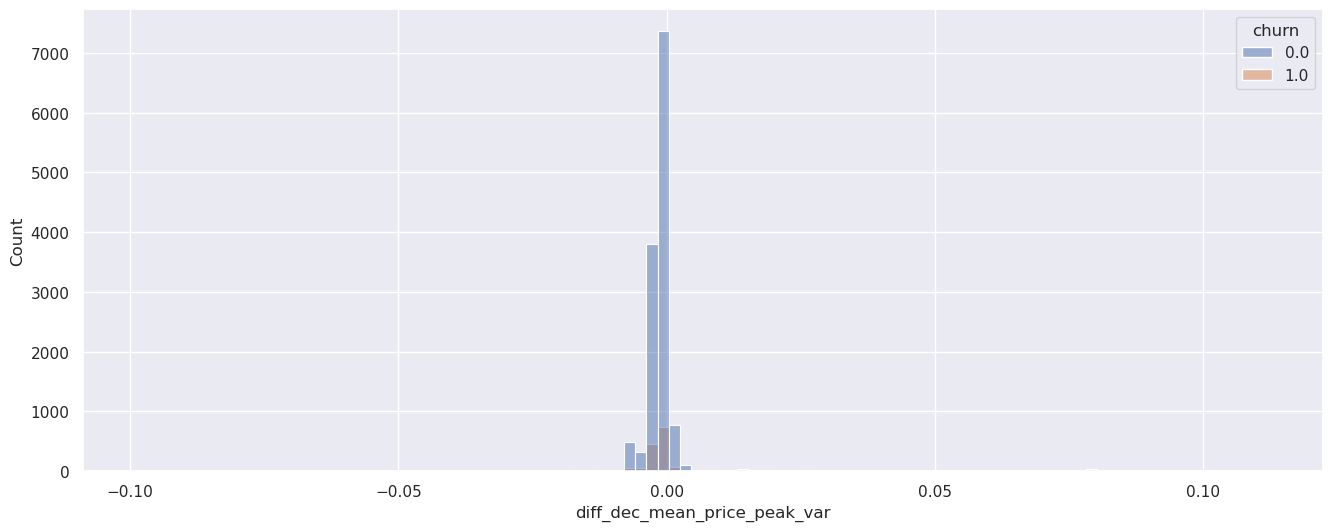

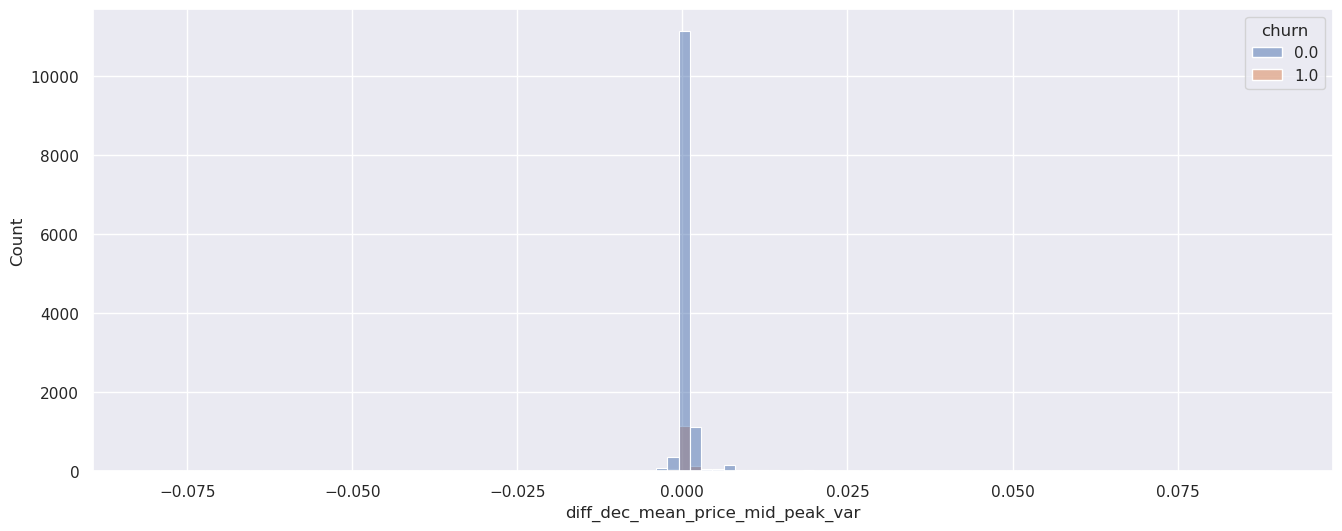

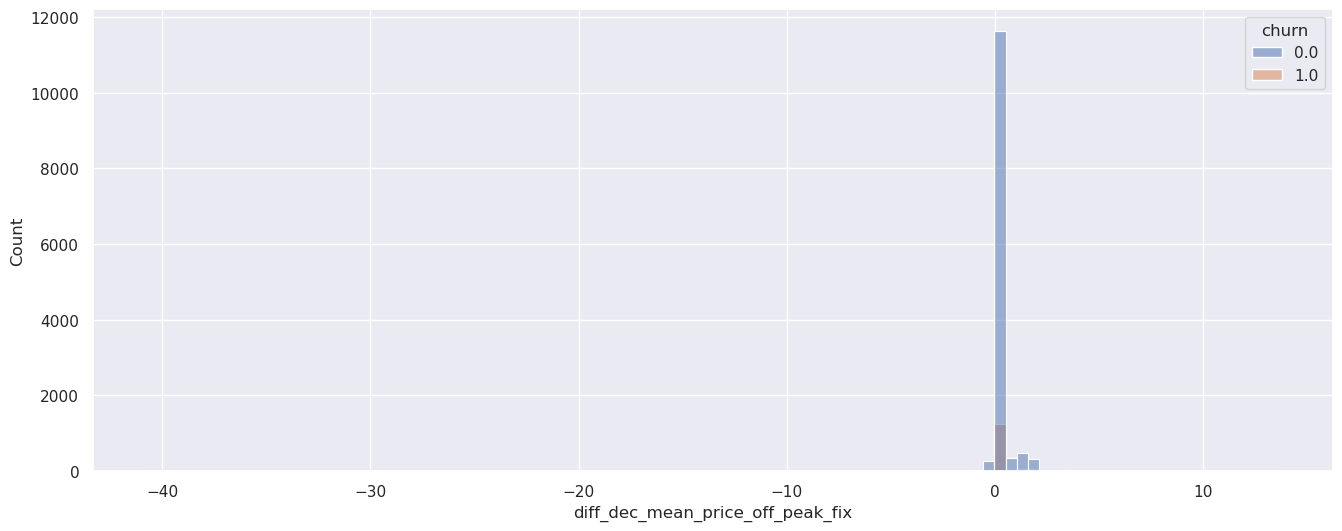

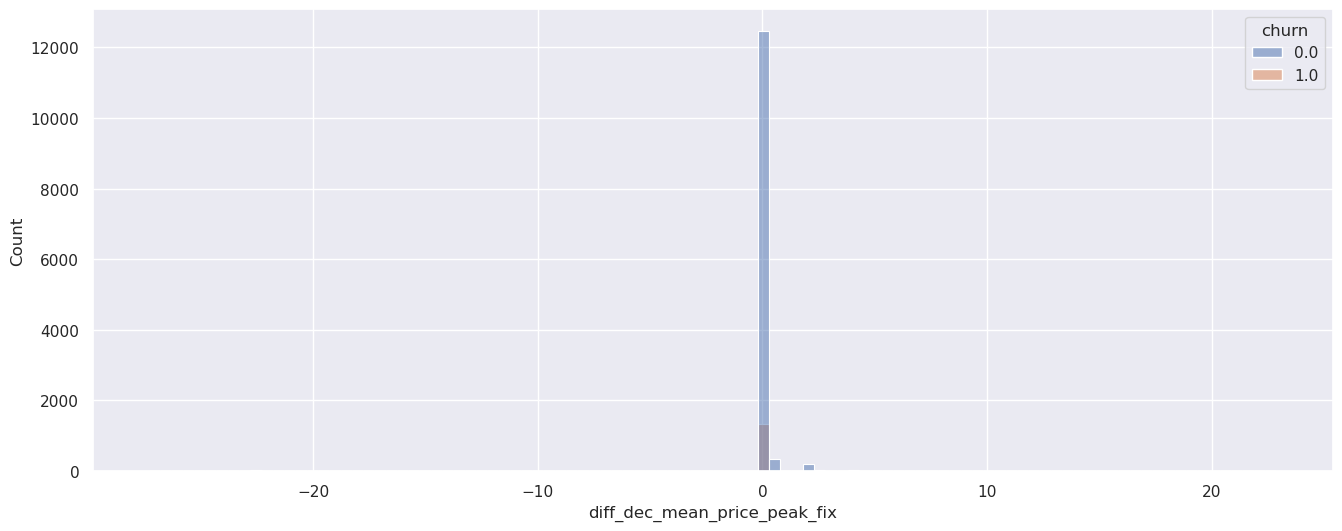

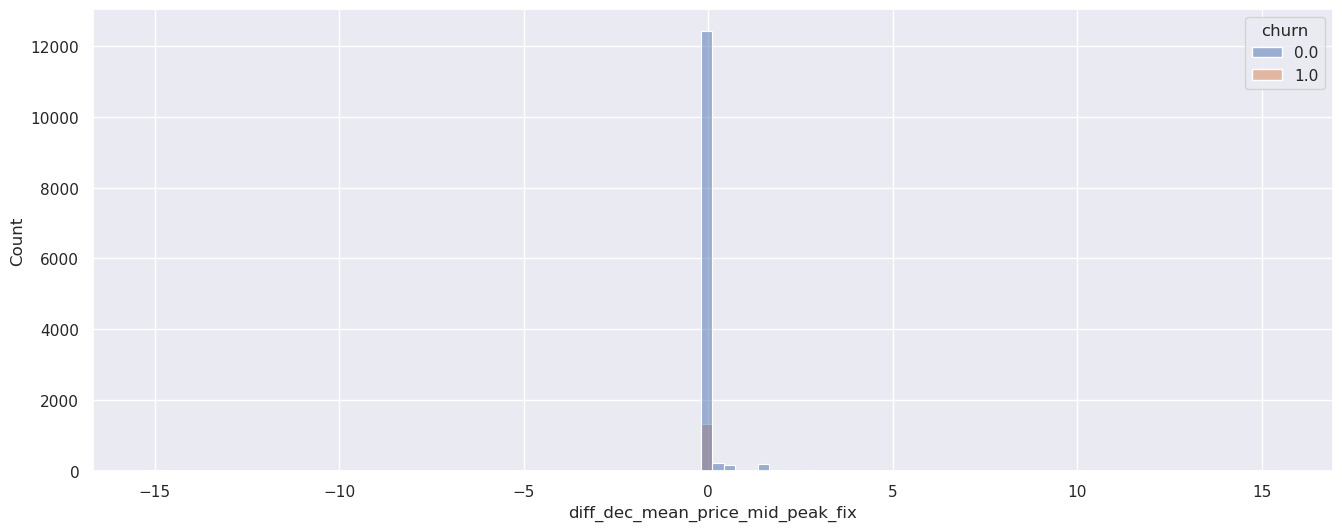

In [326]:
for attr in price_attr:
    hist_chart_cust_churn(df=price_stat,target=f'diff_dec_mean_{attr}',if_churn=True)

**Now Check chnages in the price really affect customers**

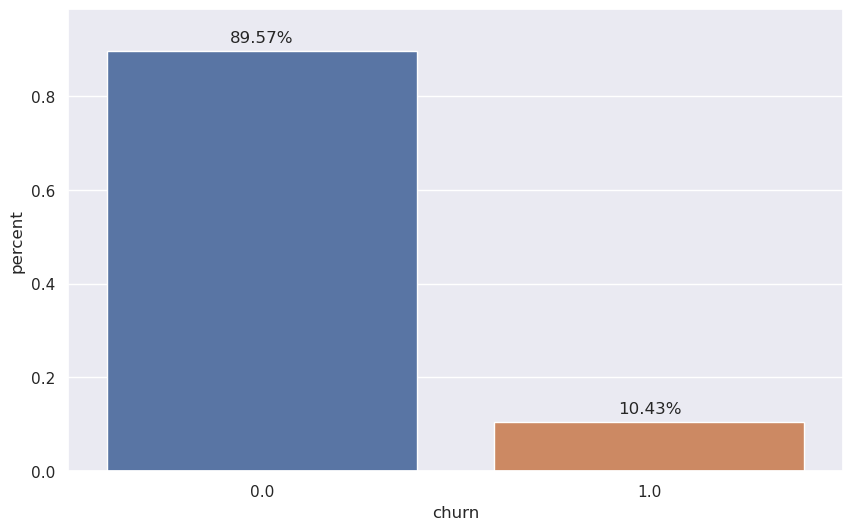

In [327]:
bar_chart_cust_percent_distribution(df=price_stat[price_stat['diff_dec_mean_price_off_peak_var']>0],target='churn',gap_bar_level=0.02)

10.43% of the customers churn after energy off peak energy prices increased.

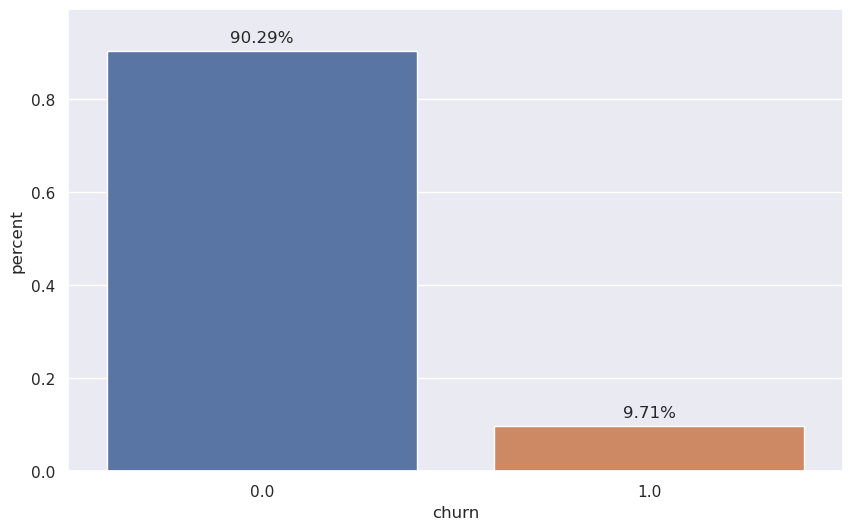

In [328]:
bar_chart_cust_percent_distribution(df=price_stat[price_stat['diff_dec_mean_price_off_peak_fix']>0],target='churn',gap_bar_level=0.02)

Among the cutomers whose off-peak enery prices did not increase (decreased or did not change), also around 9.71% of customers changed their providers.

### **From the above results, we can conclude that no matter how much price changed around 9.7% customers remains churned or switched to other providers. Therefore price does not affect in customers churn.**

Check for past 6 months and 3 months price to the december price.

In [329]:
stat_ = ['max', 'min', 'mean']

price_6month=price_df[price_df['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var':stat_,'price_off_peak_fix':stat_,})

price_6month.columns=['_'.join(x) for x in zip(price_6month.columns.get_level_values(0),price_6month.columns.get_level_values(1))]

price_6month=price_6month.reset_index()

price_6month=price_6month.merge(client[['id','churn']], on=['id'], how='left')

price_6month=price_6month.dropna(subset=['churn']).reset_index(drop=True)

for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_6month[f'diff_dec_mean_{attr}']=price_df[price_df['id'].isin(price_6month['id'])].groupby(['id'])[attr].nth(-1).values - price_6month[f'{attr}_mean']

In [330]:
price_6month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_dec_mean_price_off_peak_var,diff_dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.000744,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.000744,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.000744,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00


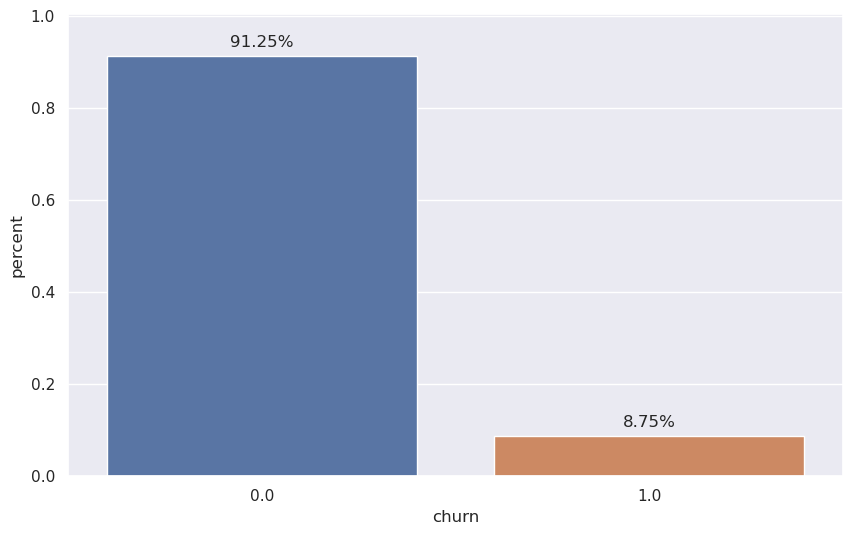

In [331]:
bar_chart_cust_percent_distribution(df=price_6month[price_6month['diff_dec_mean_price_off_peak_var']>0],target='churn',gap_bar_level=0.02)

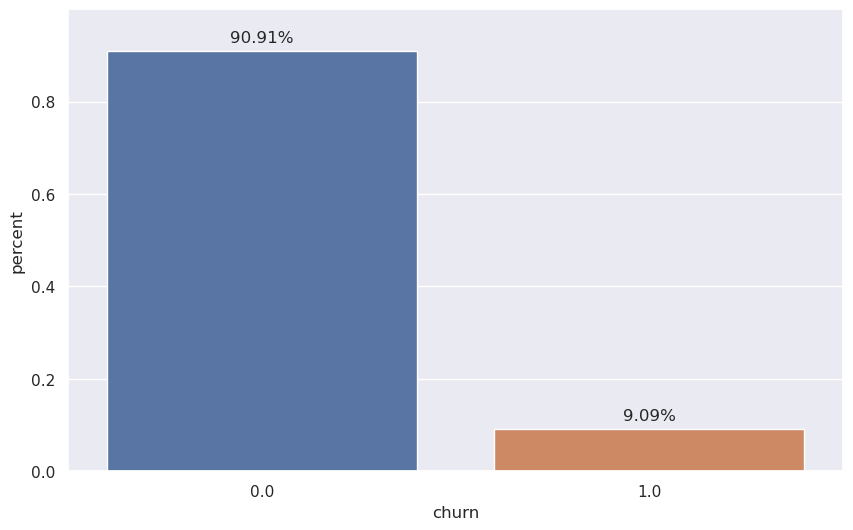

In [332]:
bar_chart_cust_percent_distribution(df=price_6month[price_6month['diff_dec_mean_price_off_peak_fix']>0],target='churn',gap_bar_level=0.02)

In [333]:
stat_ = ['max', 'min', 'mean']

price_3month=price_df[price_df['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var':stat_,'price_off_peak_fix':stat_,})

price_3month.columns=['_'.join(x) for x in zip(price_3month.columns.get_level_values(0),price_3month.columns.get_level_values(1))]

price_3month=price_3month.reset_index()

price_3month=price_3month.merge(client[['id','churn']], on=['id'], how='left')

price_3month=price_3month.dropna(subset=['churn']).reset_index(drop=True)

for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_3month[f'diff_dec_mean_{attr}']=price_df[price_df['id'].isin(price_3month['id'])].groupby(['id'])[attr].nth(-1).values - price_3month[f'{attr}_mean']

In [334]:
price_3month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_dec_mean_price_off_peak_var,diff_dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,0.0,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,0.0,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,0.0,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00


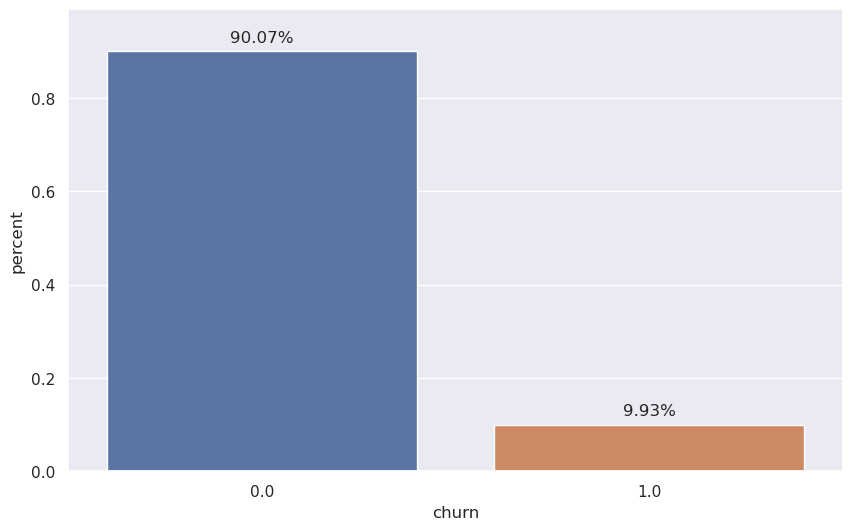

In [335]:
bar_chart_cust_percent_distribution(df=price_3month[price_3month['diff_dec_mean_price_off_peak_var']>0],target='churn',gap_bar_level=0.02)

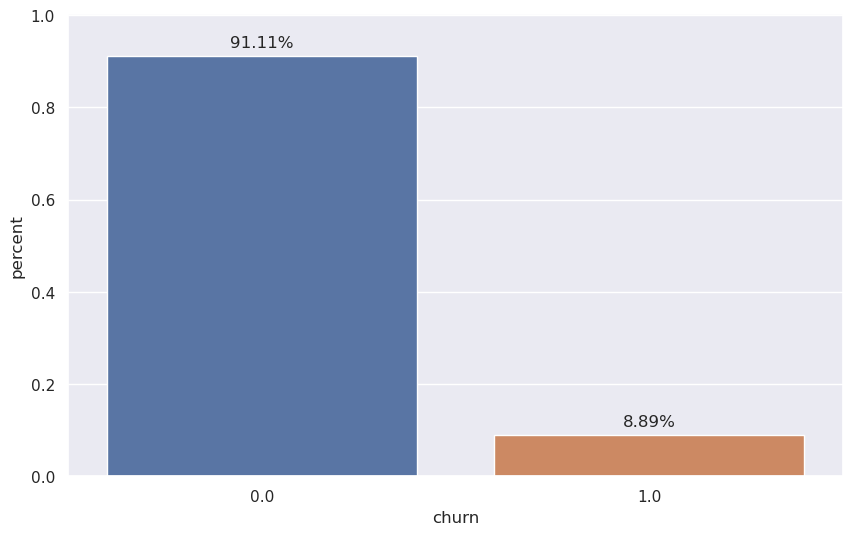

In [336]:
bar_chart_cust_percent_distribution(df=price_3month[price_3month['diff_dec_mean_price_off_peak_fix']>0],target='churn',gap_bar_level=0.02)

**From the above data of 6 and 3 months we can conclude that price does not affect for customers churn**

# Sub-task 3

**Conclusion:**
1. Nearly 9.72% of the customers churned
2. changes in price does not responsible for customers churn

**Suggestions**

1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.

2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that.

3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn.

# Feature Engineering and Modeling

* Sub-Task 1

Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power. 

This feature is “the difference between off-peak prices in December and January the preceding year”. 

Run the cells in the notebook provided (named feature_engineering.ipynb) to re-create this feature. then try to think of ways to improve the feature’s predictive power and elaborate why you made those choices. 



In [337]:
# load packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [338]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  int64         
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [339]:
train_df = client_df.copy()
train_df['year_modif_prod'] = train_df['date_modif_prod'].dt.year
train_df['year_renewal'] = train_df['date_renewal'].dt.year
train_df = train_df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
train_df['has_gas'] = has_gas_encoder.fit_transform(train_df['has_gas'])
# add new feature "diff_dec_jan_off_peak_var" and "diff_dec_jan_off_peak_fix". I just calculate the differnece between last price and first price for each customer.
diff_dec_jan_off_peak_var = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
train_dftrain_df = train_df.merge(diff_dec_jan_off_peak_var, on='id', how='left')
train_df = train_df.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1) - price_df.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    train_df = train_df.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
train_df = train_df.merge(price_stat[['id','diff_dec_mean_price_off_peak_var','diff_dec_mean_price_off_peak_fix',
                                          'diff_dec_mean_price_peak_var','diff_dec_mean_price_peak_fix',
                                          'diff_dec_mean_price_mid_peak_var','diff_dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
train_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_dec_mean_price_off_peak_var,diff_dec_mean_price_off_peak_fix,diff_dec_mean_price_peak_var,diff_dec_mean_price_peak_fix,diff_dec_mean_price_mid_peak_var,diff_dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0,1.78,0.114481,...,-0.017912,-24.339581,-0.071536,-16.226389,0.021246,3.324664,-0.015266,-22.352010,-0.066530,-14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0,16.27,0.145711,...,0.000000,0.000000,0.000000,0.000000,-0.002009,0.133335,-0.007124,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0,38.72,0.165794,...,0.000528,0.000000,0.000000,0.000000,-0.002714,0.059260,-0.000012,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.002624,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0,131.73,0.116900,...,-0.002302,0.097749,0.003487,0.065166,-0.004268,0.040729,-0.001965,0.024437,0.000854,0.016292


**Create training model**

In [340]:
X=train_df.drop(columns=['id','churn'])
y=train_df['churn']
X.shape, y.shape

((14606, 35), (14606,))

 **Sub-Task 2**
* Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case. It is up to you how to fulfill this task, but you may want to use the below points to guide your work:

* Ensure you’re able to explain the performance of your model, where did the model underperform?
Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
Document the advantages and disadvantages of using the Random Forest for this use case.
Do you think that the model performance is satisfactory? Give justification for your answer.
(Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?


Using KFold Training Model

In [341]:
pre_train_labels=np.zeros(shape=(X.shape[0],2))
important_df=pd.DataFrame(data={'feature_name':X.columns, 'feature_importance':[0]*len(X.columns)})

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=29)
fold_counter=1
for train_index,test_index in kfold.split(X,y):
    X_train,X_test= X.loc[train_index],X.loc[test_index]
    y_train,y_test= y[train_index],y[test_index]
    
    rf=RandomForestClassifier(random_state=56)
    
    rf.fit(X_train,y_train)
    pre_train_labels[test_index]=rf.predict_proba(X_test)
    
    important_df['feature_importance']=important_df['feature_importance']+(rf.feature_importances_)
    
    print(f"Fold{fold_counter} Precision {precision_score(y_test,rf.predict(X_test)):.3f} Recall {recall_score(y_test,rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test,rf.predict(X_test)):.3f}")
    fold_counter=fold_counter+1
    pred_y=pre_train_labels.argmax(axis=-1)
    print(f"Total Precision {precision_score(y,pred_y):.3f} Recall {recall_score(y,pred_y):.3f} Accuracy {accuracy_score(y,pred_y):.3f}")

Fold1 Precision 0.923 Recall 0.042 Accuracy 0.907
Total Precision 0.923 Recall 0.008 Accuracy 0.904
Fold2 Precision 0.792 Recall 0.067 Accuracy 0.908
Total Precision 0.838 Recall 0.022 Accuracy 0.905
Fold3 Precision 0.895 Recall 0.060 Accuracy 0.908
Total Precision 0.857 Recall 0.034 Accuracy 0.906
Fold4 Precision 0.944 Recall 0.060 Accuracy 0.908
Total Precision 0.878 Recall 0.046 Accuracy 0.907
Fold5 Precision 0.650 Recall 0.046 Accuracy 0.905
Total Precision 0.830 Recall 0.055 Accuracy 0.907


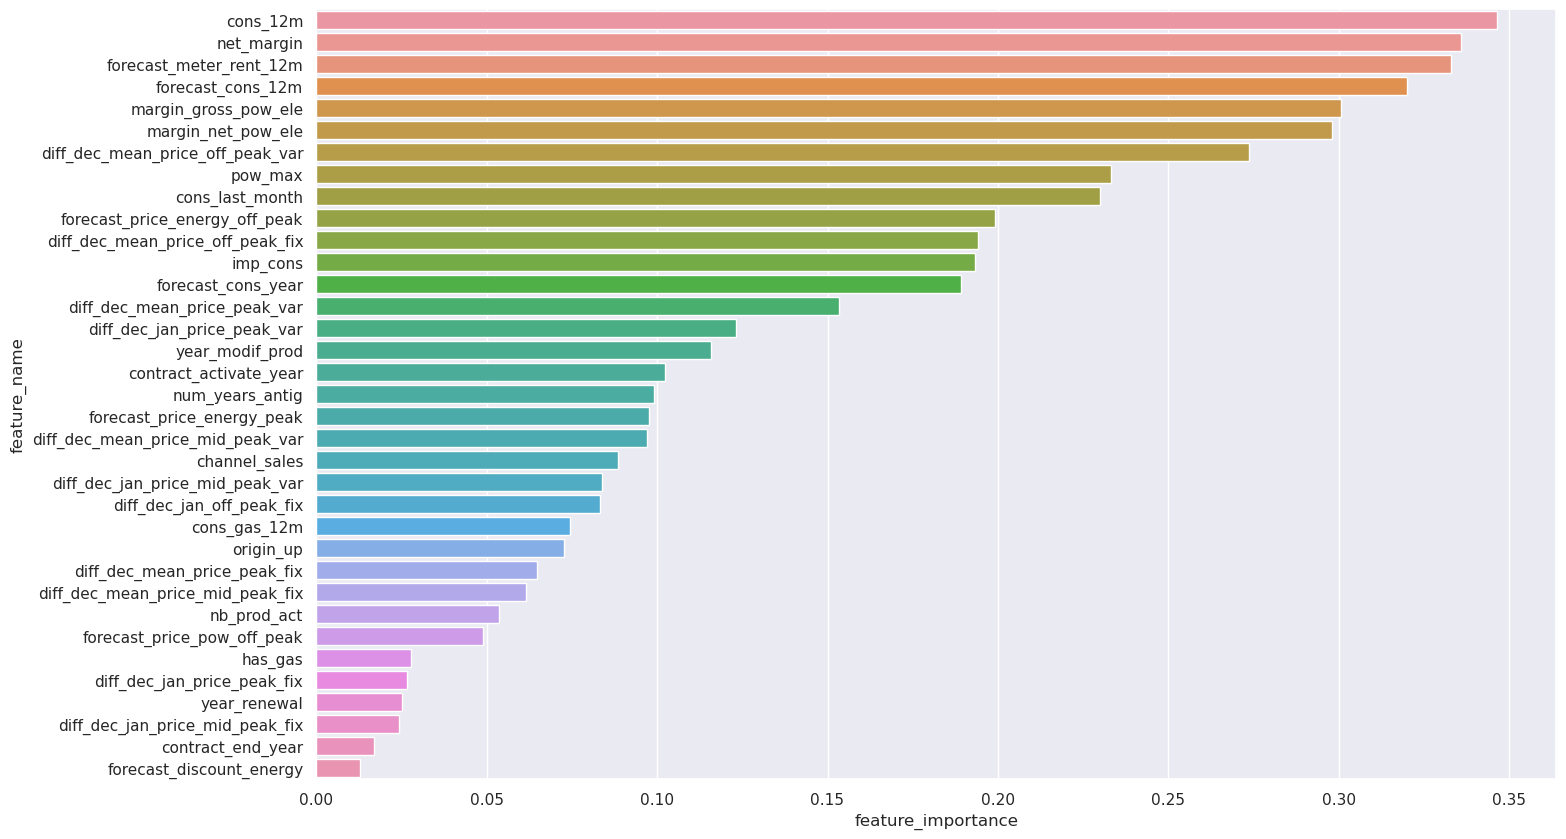

In [342]:
fig=plt.figure(figsize=(16,10))
ax=sns.barplot(data=important_df.sort_values(by=['feature_importance'],ascending=False),y='feature_name',x='feature_importance')

In [343]:
print(classification_report(y,pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.83      0.05      0.10      1419

    accuracy                           0.91     14606
   macro avg       0.87      0.53      0.53     14606
weighted avg       0.90      0.91      0.87     14606



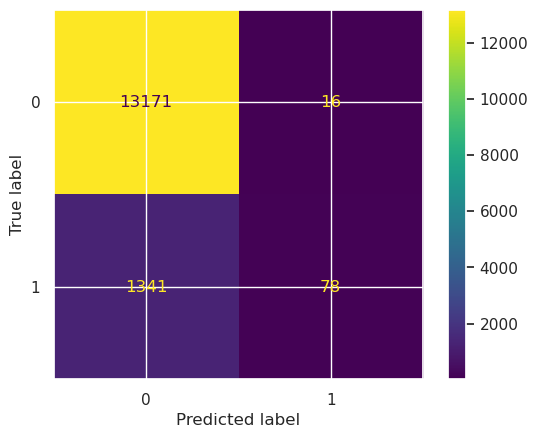

In [344]:
cm=confusion_matrix(y,pred_y,labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

Based on the results above, we can see the performance is very bad. Although the accuracy is up to 90%, it is misleading and pointless, as we only focus on correctly predicting the positive class rather than the nagetive class. The model can only find out 6% of real positive samples. But luckily, in the predicted positive samples, up to 86% of them are real positive samples.

***identify the impact of a 20% discount***

* As we know changes in prices do not have a significant impact on customer churn. So, a discount should be unable to prevent customer churn.
* and we cannot really identify whether a discount can prevent customer churn, as we do not exactly know what will happen in the future.
* Therefore, I try to calculate the expected profit based on the probability of customer churn and evaluate the impact of the discount.

In [345]:
prob_no_discount = pd.DataFrame(data = pred_train_labels, columns=['0', '1'])
prob_no_discount['id'] = train_df['id']
prob_no_discount = prob_no_discount[['id','0','1']]
prob_no_discount.head()

,id,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,0.70,0.30
1,d29c2c54acc38ff3c0614d0a653813dd,0.96,0.04
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11
3,bba03439a292a1e166f80264c16191cb,0.80,0.20
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02


In [346]:
# drop useless columns
test_data = client_df.copy()
test_data['year_modif_prod'] = test_data['date_modif_prod'].dt.year
test_data['year_renewal'] = test_data['date_renewal'].dt.year
test_data = test_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
test_data['has_gas'] = has_gas_encoder.fit_transform(test_data['has_gas'])
# apply a 20% discount
diff_dec_jan_off_peak_var = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)*0.8
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)*0.8
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
test_data = test_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
test_data = test_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')
# also add the above differences of other prices
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1)*0.8 - price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)*0.8
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    test_data = test_data.merge(diff_dec_jan_temp, on='id', how='left')
# add price changing trends
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat_test = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': ['mean'], 'price_peak_var': ['mean'], 'price_mid_peak_var': ['mean'],
                                                      'price_off_peak_fix': ['mean'], 'price_peak_fix': ['mean'], 'price_mid_peak_fix': ['mean'],})
# flatten the column names
price_stat_test.columns = ['_'.join(x) for x in zip(price_stat_test.columns.get_level_values(0), price_stat_test.columns.get_level_values(1))]
price_stat_test = price_stat_test.reset_index()
# add diff
for attr in price_attr:
    price_stat_test[f'diff_dec_mean_{attr}'] = price[price['id'].isin(price_stat_test['id'])].groupby(['id'])[attr].nth(-1).values*0.8 - price_stat_test[f'{attr}_mean']*0.8
#
test_data = test_data.merge(price_stat_test[['id','diff_dec_mean_price_off_peak_var','diff_dec_mean_price_off_peak_fix',
                                          'diff_dec_mean_price_peak_var','diff_dec_mean_price_peak_fix',
                                          'diff_dec_mean_price_mid_peak_var','diff_dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

#
test_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_dec_mean_price_off_peak_var,diff_dec_mean_price_off_peak_fix,diff_dec_mean_price_peak_var,diff_dec_mean_price_peak_fix,diff_dec_mean_price_mid_peak_var,diff_dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0,1.78,0.114481,...,-0.002881,0.078199,0.001826,0.052133,0.016997,2.659732,-0.012213,-17.881608,-0.053224,-11.921072
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0,16.27,0.145711,...,0.068386,0.000000,0.000000,0.000000,-0.001607,0.106668,-0.005699,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0,38.72,0.165794,...,0.000422,0.000000,0.000000,0.000000,-0.002171,0.047408,-0.000010,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.002099,0.035556,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0,131.73,0.116900,...,-0.001842,0.078199,0.002790,0.052133,-0.003415,0.032583,-0.001572,0.019550,0.000683,0.013033


In [347]:
testing_set = test_data.drop(columns=['id','churn','diff_dec_jan_off_peak_var'])
testing_set.shape

(14606, 35)

In [348]:

# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
pred_test_labels = np.zeros(shape=(testing_set.shape[0], 2))
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    pred_test_labels += rf.predict_proba(testing_set)/5
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# 
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.923 Recall 0.042 Accuracy 0.907
Fold 2 Precision 0.792 Recall 0.067 Accuracy 0.908
Fold 3 Precision 0.895 Recall 0.060 Accuracy 0.908
Fold 4 Precision 0.944 Recall 0.060 Accuracy 0.908
Fold 5 Precision 0.650 Recall 0.046 Accuracy 0.905
Total  Precision 0.830 Recall 0.055 Accuracy 0.907


In [349]:
prob_discount = pd.DataFrame(data=pred_test_labels, columns=['0_dis','1_dis'])
customer_prob = prob_no_discount.join(prob_discount)
customer_prob.head()

,id,0,1,0_dis,1_dis
0,24011ae4ebbe3035111d65fa7c15bc57,0.70,0.30,0.466,0.534
1,d29c2c54acc38ff3c0614d0a653813dd,0.96,0.04,0.880,0.120
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.918,0.082
3,bba03439a292a1e166f80264c16191cb,0.80,0.20,0.908,0.092
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02,0.960,0.040


**Now it's time for calculating expected profit from customers.**

In [350]:
def expect_from_a_customer(customer_id):
    # expected values without discount
    average_yearly_price_var = price_stat[price_stat['id']==customer_id]['price_off_peak_var_mean'].values[0]
    total_yearly_usage_var = client[client['id']==customer_id]['cons_12m'].values[0]
    average_yearly_price_fix = price_stat[price_stat['id']==customer_id]['price_off_peak_fix_mean'].values[0]
    total_yearly_usage_fix = client[client['id']==customer_id]['cons_gas_12m'].values[0]
    total_profit = average_yearly_price_var*total_yearly_usage_var + average_yearly_price_fix*total_yearly_usage_fix
    # 
    prob_stay = customer_prob[customer_prob['id']==customer_id]['0'].values[0]
    expected_profit = prob_stay*total_profit
    # expected values with discount
    total_profit_dis = total_profit*0.8
    # 
    prob_stay_dis = customer_prob[customer_prob['id']==customer_id]['0_dis'].values[0]
    expected_profit_dis = prob_stay_dis*total_profit_dis
    return expected_profit, expected_profit_dis

In [351]:
#now calculate profit for each and every cust
expected_no_dis, expected_dis = [],[]
for cus_id in customer_prob['id']:
    temp = expect_from_a_customer(customer_id=cus_id)
    expected_no_dis.append(temp[0])
    expected_dis.append(temp[1])
#
customer_prob['expected_no_dis'] = expected_no_dis
customer_prob['expected_dis'] = expected_dis
customer_prob['diff_discount'] = customer_prob['expected_dis'] - customer_prob['expected_no_dis']
customer_prob

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
0,24011ae4ebbe3035111d65fa7c15bc57,0.70,0.30,0.466,0.534,1.574730e+06,8.386560e+05,-736073.608878
1,d29c2c54acc38ff3c0614d0a653813dd,0.96,0.04,0.880,0.120,6.692904e+02,4.908130e+02,-178.477453
2,764c75f661154dac3a6c254cd082ea7d,0.89,0.11,0.918,0.082,8.255493e+01,6.812173e+01,-14.433199
3,bba03439a292a1e166f80264c16191cb,0.80,0.20,0.908,0.092,1.916134e+02,1.739850e+02,-17.628434
4,149d57cf92fc41cf94415803a877cb4b,0.98,0.02,0.960,0.040,5.384820e+02,4.219941e+02,-116.487942
...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.84,0.16,0.900,0.100,1.790694e+06,1.534881e+06,-255813.498490
14602,d0a6f71671571ed83b2645d23af6de00,0.42,0.58,0.336,0.664,3.239921e+02,2.073549e+02,-116.637159
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.96,0.04,0.606,0.394,2.201088e+02,1.111550e+02,-108.953875
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.95,0.05,0.868,0.132,1.861883e+01,1.360938e+01,-5.009445


In [352]:
customer_prob[customer_prob['diff_discount']>0]

,id,0,1,0_dis,1_dis,expected_no_dis,expected_dis,diff_discount
13,21860c2ff2d5df75503b230ce629c253,0.660,0.340,0.828000,0.172000,862.662291,865.799245,3.136954
128,3c4ee938001975a4d07cf27a54de433c,0.560,0.440,0.848000,0.152000,2720.372813,3295.537350,575.164537
152,5b1fbf1d729d0df8c8de04e166f3f77b,0.730,0.270,0.916000,0.084000,95.867316,96.235026,0.367710
266,643a00ea2a7026974218f0e4c26948a1,0.580,0.420,0.840000,0.160000,694.401395,804.547823,110.146428
295,a33668b7d0d8d86f38ad983c0cad6095,0.670,0.330,0.848000,0.152000,220272.049389,223033.669112,2761.619724
...,...,...,...,...,...,...,...,...
14352,ede19a19e735f1f24416966c93e5b251,0.680,0.320,0.858000,0.142000,8505.554154,8585.606429,80.052274
14446,08045c6d5f455ce1a6045a93e9cc8889,0.610,0.390,0.854000,0.146000,580.782033,650.475877,69.693844
14491,31e411796ea4fb5a3f9c75644f65885d,0.665,0.335,0.838667,0.161333,1804.862644,1820.966181,16.103536
14537,d77e823d24aa59beda5baa6bca37c903,0.590,0.410,0.842000,0.158000,247.496457,282.565447,35.068990


**There are only 291 customers remains to the company after providing 20% of the discount.**

In [353]:
customer_prob[customer_prob['diff_discount']>0].shape[0]/len(customer_prob)

0.019923319183897028

**only (1.99)~2% of all the customers**

In [354]:
customer_prob[customer_prob['1']>0.5].shape[0]

94

**no of churning customers = 94**

In [355]:
customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)].shape[0]


61

**number of customers whose expected profit increase = 61**

In [356]:
customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)].shape[0]


33

**number of customers whose expected profit decrease = 33**

In [357]:
#total extra profit from customers whose expected profit increase

customer_prob[(customer_prob['diff_discount']>0)&(customer_prob['1']>0.5)]['diff_discount'].sum()


1847341.5027712001

In [358]:
#total extra profit from customers whose expected profit decrease

customer_prob[(customer_prob['diff_discount']<=0)&(customer_prob['1']>0.5)]['diff_discount'].sum()


-2406983.9224732094

***Total Extra Profit from Churning Customers***

In [359]:
customer_prob[customer_prob['1']>0.5]['diff_discount'].sum()


-559642.4197020087

**Based on the results above, it seems offering a discount to the predicted churning customers can decrease profit from these customers.**